# Impact of Weather on Home Sales In King County, WA

##### This project investigates the impact of different weather conditions on the home sales and home prices through 2014 and 2015 in King County, WA. Different properties of the homes and theirimpact on the price of the houses have been studied. Also different biases which might have existed have been investigated, addressed and explained. The house sales dataset is in the form of csv and has been obtained from Kaggle and the weather dataset is in the form of a json file and has been purchased from Open Weather Map.


In [1]:
#The modules required are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime 
import json
import statistics
import matplotlib as mpl

In [2]:
#creating a file path and reading the house sales dataset (which is a csv file) 
file = '../Resources/kc_house_data.csv'
df=pd.read_csv(file)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Modifying date in the house sales dataset in order to normalize it with the date on the weather dataset
df["date"] = pd.to_datetime(df["date"]).dt.strftime('%Y-%m-%d')
df.sort_values('date')



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
20559,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0,...,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306
18690,1737320120,2014-05-02,470000.0,5,2.50,2210,9655,1.0,0,0,...,8,1460,750,1976,0,98011,47.7698,-122.222,2080,8633
1041,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,...,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500
172,1999700045,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,...,7,1340,0,1955,0,98133,47.7658,-122.339,1480,7940
7734,1962200037,2014-05-02,626000.0,3,2.25,1750,1572,2.5,0,0,...,9,1470,280,2005,0,98102,47.6498,-122.321,2410,3050


In [4]:
#Removing the day and month from the date to keep only the month and year to perform investigations by month and year
dateym=[]
num = 0
for index, row in df.iterrows():
    mdate = df['date'][num][0:7]
    dateym.append(mdate)
    num = num + 1

In [5]:
#Insrting the month and year obtained above into a new column
df['date(Y/M)']=dateym

In [6]:
#In the house sales dataset a house with 33 bedrooms was noticed which on the basis of its square feet seemed to be wrong and here is being eleminated 
df.loc[df['bedrooms']==33]
df1=df[df.bedrooms != 33]


In [7]:
#Obtaining the average price of the houses build in each year
buildyrdf=df1.groupby('yr_built').mean()

buildyrdf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
yr_built,,,,,,,,,,,,,,,,,,,
1900,5.060402e+09,581536.632184,3.275862,1.729885,1732.011494,10869.597701,1.505747,0.000000,0.252874,3.528736,6.873563,1487.068966,244.942529,435.344828,98104.655172,47.594106,-122.288874,1667.114943,7222.195402
1901,5.036920e+09,557108.344828,3.620690,1.577586,1763.620690,4142.931034,1.568966,0.000000,0.068966,3.655172,7.034483,1513.620690,250.000000,68.517241,98121.000000,47.630710,-122.329793,1530.965517,3947.862069
1902,4.280460e+09,673192.592593,3.555556,1.925926,1919.629630,4766.518519,1.740741,0.000000,0.074074,3.629630,7.444444,1784.074074,135.555556,145.740741,98116.518519,47.616689,-122.314556,1913.703704,4576.888889
1903,4.508135e+09,480958.195652,3.065217,1.505435,1507.739130,6364.565217,1.456522,0.021739,0.239130,3.500000,6.869565,1402.869565,104.869565,260.130435,98105.608696,47.591474,-122.287261,1537.608696,5303.760870
1904,4.542878e+09,583867.755556,2.911111,1.500000,1603.177778,5410.000000,1.344444,0.000000,0.066667,3.800000,6.911111,1307.177778,296.000000,266.400000,98117.933333,47.609891,-122.316822,1630.222222,4600.066667
1905,4.427030e+09,753443.932432,3.310811,1.864865,1965.810811,10311.081081,1.621622,0.013514,0.256757,3.770270,7.472973,1641.351351,324.459459,459.486486,98110.972973,47.602680,-122.312554,1811.486486,6341.148649
1906,3.719887e+09,670027.663043,3.228261,1.777174,1802.228261,5325.195652,1.494565,0.000000,0.130435,3.673913,7.184783,1537.554348,264.673913,174.369565,98110.750000,47.628545,-122.315707,1705.217391,4442.728261
1907,4.281123e+09,676324.476923,3.261538,1.784615,1904.276923,5161.307692,1.615385,0.000000,0.169231,3.661538,7.261538,1601.661538,302.615385,429.492308,98113.030769,47.607817,-122.320046,1766.153846,4925.184615
1908,4.809381e+09,564499.848837,3.081395,1.636628,1699.639535,6492.511628,1.436047,0.011628,0.406977,3.767442,6.953488,1398.965116,300.674419,324.255814,98112.313953,47.594113,-122.315558,1744.767442,6270.604651


### Dependence of House Prices on the Year in which they were buit 

##### As observed in the graph below the average price for the older houses (built before 1940) seems to be higher. The average price of the houses built between 1940 and 1980 seems to be stable and after 1980 the newer houses have a higher price. The price seems to have a gentle correlation with the newness of the house. The newer the house, the higher the price which is logical. On the other hand, the high prices asspciated with older houses might be due to their historicl value or bigger size as houses tended to be bigger at old times.

Current size: [30.0, 20.0]


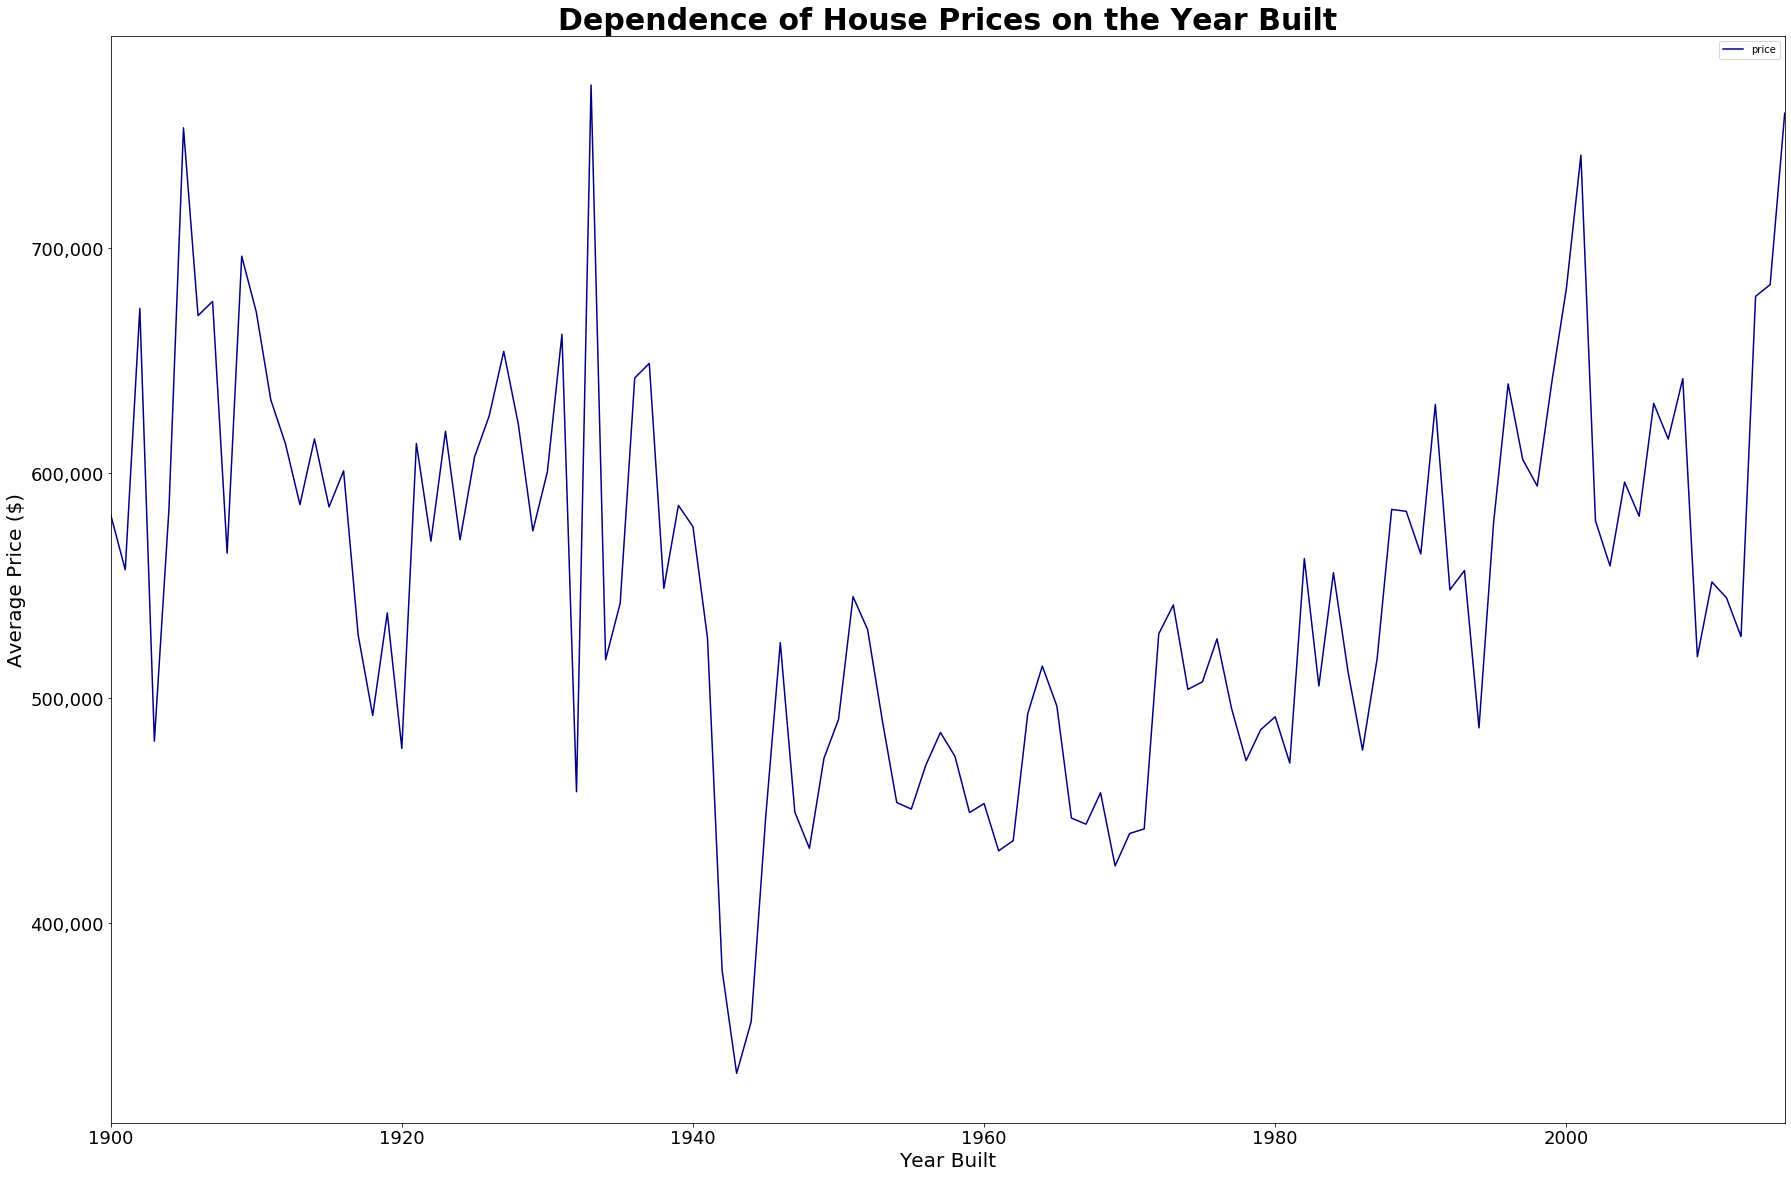

In [12]:
#Plotting the average price of the houses against the year when they were built.   
ax=buildyrdf.plot(kind='line', y='price', color='navy')
x_lim = len(df.index)
# Chart title
plt.title("Dependence of House Prices on the Year Built", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Year Built", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Average Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))



fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvsyearbuilt.png')

plt.show()

In [13]:
#Obtaining the average price of the houses by the number of bedrooms
bedroomdf=df1.groupby('bedrooms').mean()
bedroomdf

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,,
0,4.632838e+09,4.102231e+05,0.826923,1707.846154,24141.307692,1.961538,0.000000,0.307692,2.846154,6.692308,1707.846154,0.000000,1983.846154,0.000000,98066.692308,47.511415,-122.150231,2036.923077,26097.076923
1,4.143251e+09,3.176580e+05,1.066583,884.613065,16285.673367,1.150754,0.025126,0.246231,3.266332,6.100503,823.859296,60.753769,1942.663317,169.638191,98103.417085,47.567169,-122.256854,1449.567839,14240.221106
2,4.636499e+09,4.013877e+05,1.401721,1239.752899,12096.726087,1.306703,0.011232,0.178623,3.377899,6.871739,1107.240942,132.511957,1955.413043,81.382609,98105.953623,47.588601,-122.278570,1503.785507,9693.109058
3,4.535884e+09,4.662766e+05,1.968394,1805.837235,14414.790208,1.449410,0.006515,0.187805,3.415513,7.472516,1584.442284,221.394951,1971.812602,76.001425,98076.478217,47.551478,-122.213344,1835.443506,12809.343648
4,4.658470e+09,6.355647e+05,2.436428,2554.649666,16720.793374,1.616100,0.005812,0.268091,3.406568,8.116681,2198.300639,356.349026,1976.594740,87.112467,98069.749201,47.556118,-122.189139,2291.124818,13727.256030
5,4.517188e+09,7.868741e+05,2.778576,3047.545284,16769.022486,1.579638,0.011868,0.409744,3.449094,8.272330,2407.566521,639.978763,1974.204872,101.061836,98070.188007,47.574169,-122.201242,2442.706433,13089.471580
6,4.391720e+09,8.258535e+05,3.068015,3284.341912,18586.930147,1.606618,0.014706,0.544118,3.470588,8.080882,2494.386029,789.955882,1963.036765,168.573529,98079.463235,47.580421,-122.240728,2280.176471,14756.878676
7,4.027151e+09,9.514478e+05,3.651316,3974.210526,20840.552632,1.723684,0.000000,0.500000,3.447368,8.447368,3160.263158,813.947368,1962.842105,210.657895,98085.815789,47.609024,-122.240711,2335.263158,15811.289474
8,4.684170e+09,1.105077e+06,3.557692,3800.000000,8971.615385,1.692308,0.000000,0.230769,3.538462,8.076923,2660.769231,1139.230769,1956.307692,0.000000,98081.846154,47.630008,-122.268769,2265.384615,7355.923077


# Dependence of the House Prices on the Number of Bedrooms

##### As it can be observed in the bar graph below, the house prices show a direct dependence on the number of bedrooms. Houses with zero bedrooms seem to have higher prices than houses with bedrooms up to 8. The bias was analyzed and there is one property with a high price among the 22 items with no bedrooms (1100000 dollars). These items either are bacholer appartments or pieces of land. The average prices of houses has a direct correlation with the number of bedrooms from 1 to 8 bedrooms. For 9, 10 and 11 bedrooms the number of properties are low and the low price of some of them (which could be due to the property condition, location, etc) have impacted the average price. There is only one 11 bedroom house in the dataset.

Current size: [30.0, 20.0]


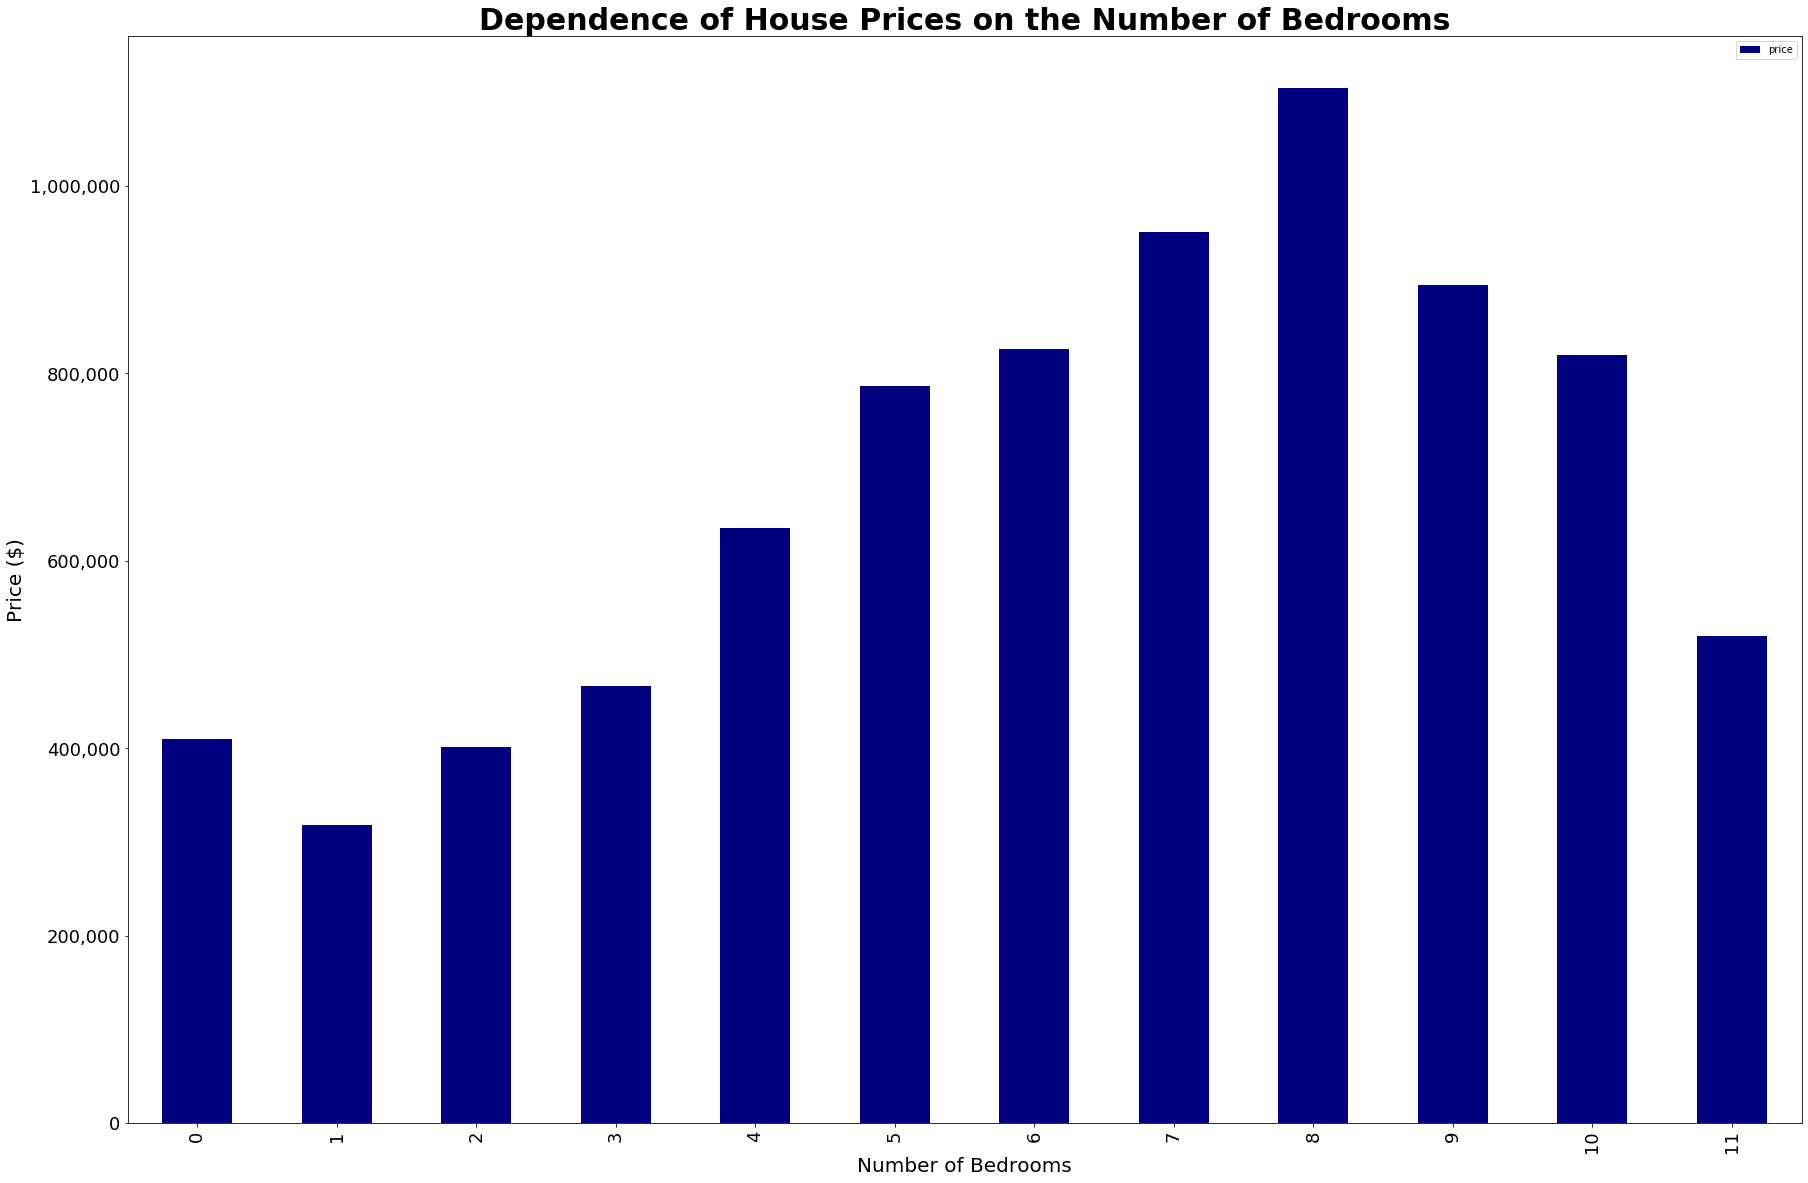

In [14]:
#Plotting the average price of the houses against the number of bedrooms

ax=bedroomdf.plot(kind='bar', y='price', color='navy')
x_lim = len(df.index)
# Chart title
plt.title("Dependence of House Prices on the Number of Bedrooms", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Number of Bedrooms", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvsbedrooms.png')

plt.show()

In [15]:
#Looking into the properties with no bedrooms to address the bias
nobedroom = df1.loc[df1['bedrooms']== 0]
nobedroom

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date(Y/M)
875,6306400140,2014-06-12,1100000.0,0,0.00,3064,4764,3.5,0,2,...,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,2014-06
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,2015-02
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,2014-08
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,390,0,1953,0,98118,47.5260,-122.261,2170,6000,2014-10
6994,2954400190,2014-06-24,1300000.0,0,0.00,4810,28008,2.0,0,0,...,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,2014-06
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,2014-11
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,2014-09
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,2015-04
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,2014-12
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,1490,0,1999,0,98065,47.5261,-121.826,1500,4675,2015-02


# Dependence of the House Prices on the Living Area Square Footage

##### As it can be observed from the scatter plot, there a direct and linear correlation between the average house prices and the square footage of their living area. The more the living area square footage the higher the price. 

Current size: [30.0, 20.0]


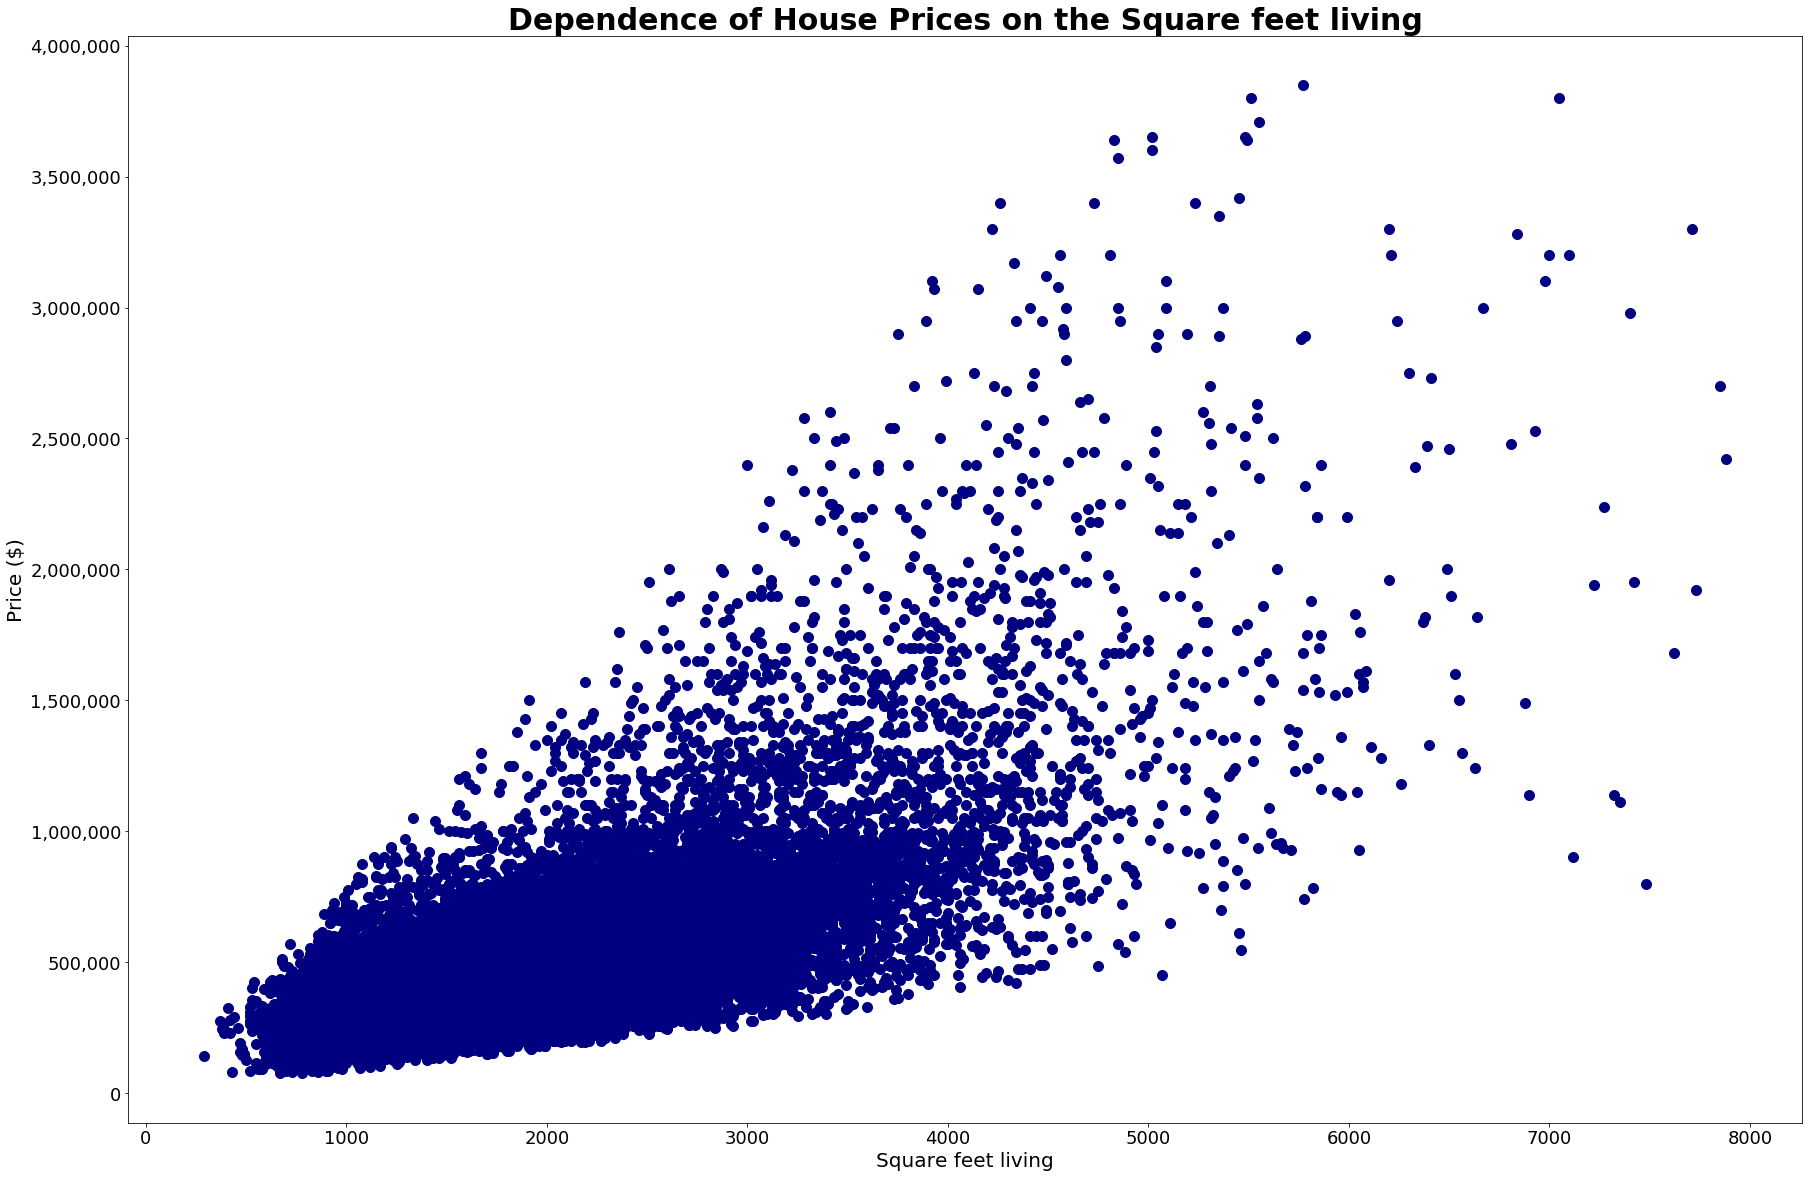

In [17]:
#Investigating the dependence of the price on the square feet of living area. The houses with prices over 4000,000$ and the square footage over 8000 sqf have been removed to eleminate the bias
nopricebias=df1.loc[df1['price']<4000000]
sqfnobias=nopricebias.loc[nopricebias['sqft_living']<8000]
ax=sqfnobias.plot(kind='scatter', x='sqft_living', y='price', c='navy',s=100)
x_lim = len(sqfnobias.index)
# Chart title
plt.title("Dependence of House Prices on the Square feet living", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Square feet living", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvssqrftliving.png')

plt.show()

# Dependence of the House Prices on the Basement Square Footage 

##### It can be seen from the graph below that houses with no basement have prices in a large range which is probabily due to their location, size or condition. However in the case of houses with basements, there is a clear correlation between the square footage of the base ment and the average prices of the houses. The bigger the basement, the higher the price. In some cases this correlation seems to be stronger and in some cases it is weeker. 

Current size: [30.0, 20.0]


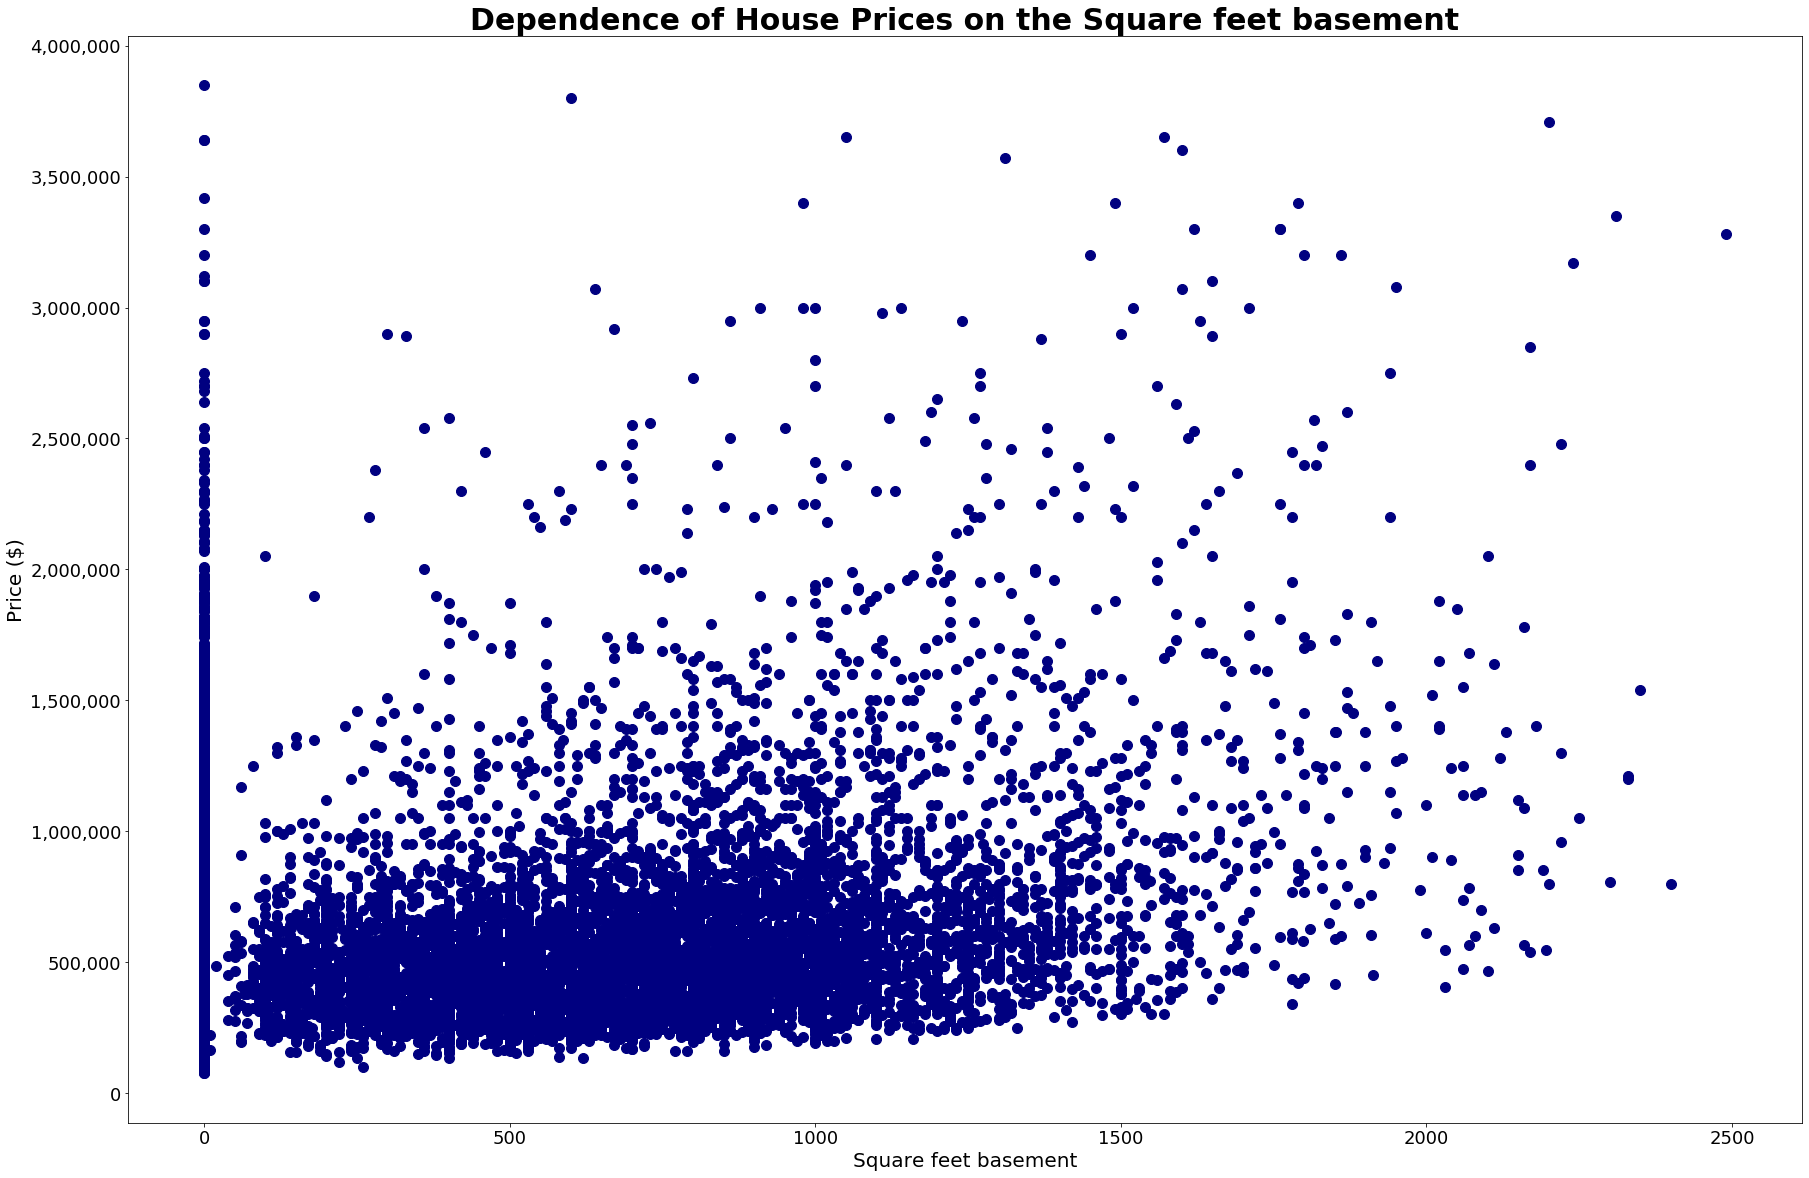

In [19]:
#Investigating the dependence of the price on the square feet of basement. Here in addition to eleminating prices above 4000,000 and sqf above 8000 sqf, the basement sqf above 2500 also has been removed to eleminate the bias.
bsmentnobias=nopricebias.loc[nopricebias['sqft_basement']<2500]
ax=bsmentnobias.plot(kind='scatter', x='sqft_basement', y='price', c='navy',s=100)
x_lim = len(bsmentnobias.index)
# Chart title
plt.title("Dependence of House Prices on the Square feet basement", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Square feet basement", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvssqrftbasement.png')

plt.show()

In [20]:
#Investigation of the house prices on the basis of number of floors
floordf=df1.groupby('floors').mean()
floordf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
floors,,,,,,,,,,,,,,,,,,,
1.0,4.517639e+09,4.422011e+05,3.157880,1.751522,1731.856635,14569.207791,0.005338,0.213597,3.550707,7.148984,1331.224459,400.632175,1960.402098,73.978650,98081.167993,47.555717,-122.234604,1777.832569,12549.418953
1.5,4.549761e+09,5.590449e+05,3.506283,1.771728,1907.880628,16966.476440,0.010995,0.249738,3.689529,7.192670,1646.653403,261.227225,1935.107330,143.146597,98102.585340,47.590323,-122.274702,1761.948691,13203.650785
2.0,4.677829e+09,6.490515e+05,3.631234,2.622619,2571.279092,16133.744448,0.009101,0.248149,3.187841,8.360272,2398.800631,172.478461,1990.720908,86.009586,98065.350443,47.550779,-122.163837,2330.476398,13575.054969
2.5,4.578060e+09,1.061021e+06,3.987578,2.835404,3145.428571,17347.291925,0.012422,0.509317,3.478261,8.894410,2789.857143,355.571429,1961.310559,223.503106,98092.503106,47.586585,-122.243913,2349.745342,17118.993789
3.0,4.475630e+09,5.826201e+05,2.952692,2.489804,1788.311582,4461.562806,0.013051,0.285481,3.035889,8.161501,1719.391517,68.920065,2004.846656,26.050571,98109.918434,47.657718,-122.327075,1605.885808,3388.778140
3.5,3.390713e+09,9.339375e+05,3.000000,2.531250,2518.000000,3038.750000,0.000000,0.500000,3.250000,8.375000,2315.500000,202.500000,1990.625000,0.000000,98106.625000,47.639900,-122.330875,1882.500000,2525.875000


# Dependence of the House Prices on the Number of Floors

##### The graph below shows that there is a direct correlation between the number of floors and the average house prices. For houses with between 1 and 2.5 floors, the price iincreases with increasing number of floors. For houses with 3 and 3.5 floors, their prices is lower than 2.5 floor houses and this can be due to their location and condition. 

Current size: [30.0, 20.0]


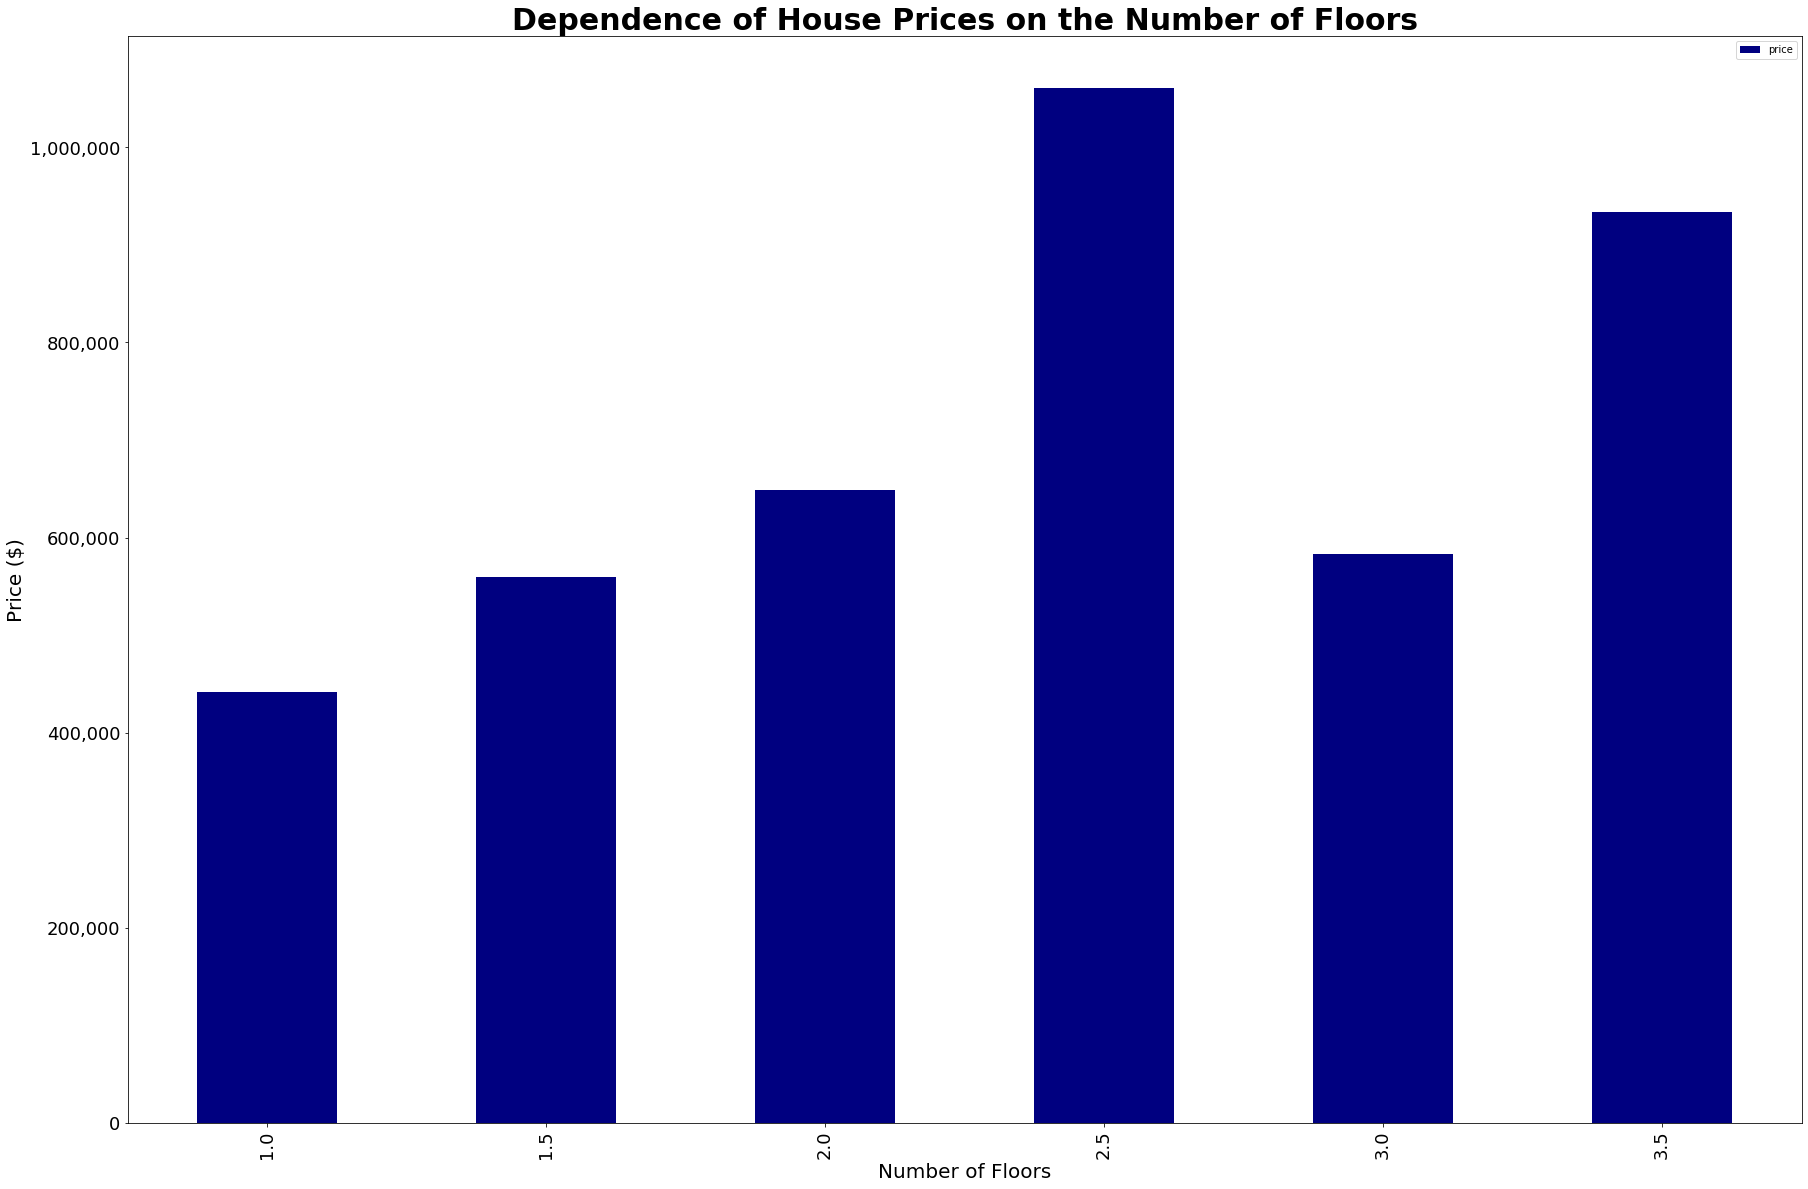

In [21]:
#Plotting average house prices against the number of floors
ax=floordf.plot(kind='bar', y='price', color='navy')
x_lim = len(df.index)
# Chart title
plt.title("Dependence of House Prices on the Number of Floors", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Number of Floors", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvssqrftfloors.png')

plt.show()

In [22]:
#Obtaing date as year and month
datey=[]
num1 = 0
for index, row in df.iterrows():
    ydate = df['date'][num1][0:4]
    datey.append(ydate)
    num1 = num1 + 1


In [23]:
#Inserting date as year and month
df['date(Y)']=datey

In [24]:
#Obtaining house sales by year and month and day
housesalesbydateymd=df.groupby('date').mean()
housesalesbydateymd

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
2014-05-02,4.088342e+09,5.261918e+05,3.402985,2.138060,2102.835821,15640.477612,1.462687,0.000000,0.223881,3.447761,7.835821,1819.850746,282.985075,1972.850746,29.761194,98075.402985,47.570193,-122.183612,2068.358209,15771.328358
2014-05-03,6.709662e+09,4.669700e+05,3.000000,1.812500,1620.000000,8901.000000,1.250000,0.000000,0.000000,3.500000,7.000000,1490.000000,130.000000,1978.750000,0.000000,98067.000000,47.548425,-122.079750,1910.000000,27967.500000
2014-05-04,5.848658e+09,5.766900e+05,3.200000,2.400000,2508.000000,7563.000000,1.400000,0.000000,0.400000,3.400000,8.400000,1878.000000,630.000000,1972.400000,0.000000,98089.400000,47.525660,-122.196200,2265.000000,7438.800000
2014-05-05,4.571210e+09,5.810577e+05,3.523810,2.193452,2257.845238,17966.309524,1.565476,0.000000,0.202381,3.440476,7.833333,1887.607143,370.238095,1972.857143,141.988095,98079.773810,47.593731,-122.205560,2035.726190,13471.428571
2014-05-06,4.553568e+09,5.341684e+05,3.493976,2.171687,2102.168675,12127.662651,1.457831,0.000000,0.120482,3.349398,7.650602,1769.638554,332.530120,1969.108434,193.373494,98080.481928,47.597886,-122.237205,1974.349398,10881.469880
2014-05-07,4.290104e+09,5.402663e+05,3.376344,2.193548,2069.537634,19551.172043,1.478495,0.000000,0.161290,3.483871,7.655914,1747.924731,321.612903,1966.301075,128.322581,98081.139785,47.569767,-122.230000,1932.182796,14230.075269
2014-05-08,4.575766e+09,5.286861e+05,3.259259,1.996914,1948.283951,20541.148148,1.530864,0.012346,0.209877,3.444444,7.580247,1670.135802,278.148148,1970.604938,98.950617,98078.987654,47.555285,-122.209185,2005.259259,16014.259259
2014-05-09,4.888940e+09,5.351328e+05,3.432099,2.253086,2207.506173,22932.037037,1.506173,0.012346,0.271605,3.456790,7.876543,1929.172840,278.333333,1975.185185,123.185185,98064.246914,47.550760,-122.177049,2060.506173,20411.604938
2014-05-10,5.638003e+09,4.809700e+05,3.800000,2.150000,2200.000000,6153.400000,1.600000,0.000000,0.000000,3.400000,7.600000,1496.000000,704.000000,1974.200000,401.400000,98090.800000,47.502080,-122.268800,1746.000000,6118.000000


In [25]:
#Obtaining house sales by year and month
housesalesbydateym=df.groupby('date(Y/M)').mean()
housesalesbydateym

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date(Y/M),,,,,,,,,,,,,,,,,,,,
2014-05,4.628282e+09,548166.600113,3.389706,2.139847,2114.912896,15959.428167,1.493495,0.005656,0.247738,3.436086,7.724548,1797.126131,317.786765,1970.536765,118.639706,98079.101244,47.570395,-122.215372,2003.056561,12935.194005
2014-06,4.573257e+09,558123.736239,3.418349,2.163876,2132.820642,14260.094954,1.513303,0.008716,0.241743,3.460092,7.738532,1822.365138,310.455505,1970.741284,80.543119,98079.594495,47.565591,-122.214406,2035.218807,12842.035780
2014-07,4.578350e+09,544892.161013,3.391678,2.146540,2128.246495,13857.654907,1.522162,0.006784,0.221167,3.442786,7.716870,1841.531886,286.714609,1971.777024,92.125283,98074.758933,47.560198,-122.206664,2029.130710,12584.116689
2014-08,4.616929e+09,536527.039691,3.355670,2.123067,2084.762887,14636.380928,1.500258,0.006186,0.223196,3.440206,7.685567,1798.204639,286.558247,1972.058247,78.193814,98077.058247,47.564831,-122.209811,1995.676289,12960.812887
2014-09,4.458143e+09,529315.868095,3.360203,2.130919,2077.375986,15367.856257,1.490981,0.008455,0.248591,3.430665,7.640361,1785.519166,291.856821,1970.535513,99.047914,98078.445885,47.560565,-122.212648,1982.601466,11894.253100
2014-10,4.525103e+09,539127.477636,3.360490,2.118876,2083.896166,15489.720980,1.502929,0.008520,0.244409,3.411076,7.640043,1787.299255,296.596912,1970.119808,94.473376,98078.614483,47.562153,-122.217433,1981.560703,12989.555911
2014-11,4.523550e+09,522058.861800,3.333806,2.079376,2048.768958,15258.856130,1.500709,0.010631,0.221120,3.401843,7.610914,1775.916371,272.852587,1970.090716,87.574061,98078.540043,47.557782,-122.218147,1940.676825,12954.836286
2014-12,4.559764e+09,524602.893270,3.390891,2.102991,2091.339225,15330.740313,1.487084,0.008158,0.216859,3.394969,7.657376,1787.078858,304.260367,1971.276003,77.410605,98077.550646,47.559581,-122.220801,1976.046907,13091.547247
2015-01,4.574031e+09,525963.251534,3.387526,2.129346,2085.094070,17869.721881,1.478528,0.008180,0.246421,3.347648,7.642127,1814.019427,271.074642,1971.749489,73.433538,98077.897751,47.553500,-122.212188,1975.859918,12687.026585


In [26]:
#Obtaining house sales by year
housesalesbydatey=df.groupby('date(Y)').mean()
housesalesbydatey

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date(Y),,,,,,,,,,,,,,,,,,,,
2014,4.560180e+09,539280.460739,3.377161,2.128904,2098.319073,14950.534272,1.502631,0.007791,0.233582,3.429919,7.681542,1802.015240,296.303834,1970.933985,90.978883,98077.895852,47.562848,-122.213923,1996.840498,12770.057473
2015,4.622485e+09,542072.495129,3.357593,2.085100,2041.285100,15434.917192,1.476862,0.007020,0.235817,3.366476,7.605158,1759.827937,281.457163,1971.154298,70.614900,98078.031948,47.554192,-122.213841,1964.984527,12765.097564


In [27]:
#Obtaing house sales by date and zipcode
housesalebyymdszc=df.groupby(['zipcode', 'date']).mean()
housesalebyymdszc

id         price  bedrooms  bathrooms  \
zipcode date                                                          
98001   2014-05-02  3.328500e+09  2.850000e+05  4.000000   2.500000   
        2014-05-05  4.736560e+09  2.145000e+05  3.000000   1.750000   
        2014-05-06  5.854715e+09  2.785000e+05  3.500000   1.875000   
        2014-05-07  5.255317e+09  2.916667e+05  3.000000   2.083333   
        2014-05-08  1.742451e+09  2.460000e+05  3.500000   1.750000   
        2014-05-09  6.858204e+09  2.726667e+05  4.000000   2.500000   
        2014-05-13  2.602269e+09  2.508500e+05  3.000000   1.500000   
        2014-05-14  3.751600e+09  1.390000e+05  3.000000   1.000000   
        2014-05-15  5.556800e+09  2.047000e+05  4.000000   2.000000   
        2014-05-20  5.142750e+09  3.724975e+05  3.000000   1.750000   
        2014-05-21  4.549473e+09  2.150000e+05  3.333333   2.083333   
        2014-05-23  2.158700e+09  1.537500e+05  2.500000   1.000000   
        2014-05-26  3.750604e+09  1.725000e+05  3.000000   1.000000   
        2014-05-27  2.005950e+09  2.600000e+05  3.000000   2.000000   
        2014-05-28  2.856712e+09  2.327500e+05  3.000000   1.937500   
        2014-05-30  5.661803e+09  1.932200e+05  3.000000   2.125000   
        2014-06-03  7.483390e+09  2.657000e+05  4.000000   2.375000   
        2014-06-04  3.751603e+09  2.125000e+05  3.000000   1.000000   
        2014-06-05  5.137691e+09  2.475250e+05  3.250000   2.125000   
        2014-06-06  4.031000e+09  2.000000e+05  2.000000   1.000000   
        2014-06-09  4.369625e+09  2.986250e+05  4.000000   2.250000   
        2014-06-10  4.031000e+09  1.995000e+05  3.000000   1.000000   
        2014-06-11  9.264030e+09  4.550000e+05  4.000000   2.500000   
        2014-06-13  5.647900e+09  2.506000e+05  4.000000   2.500000   
        2014-06-16  2.460600e+09  1.750000e+05  3.000000   1.500000   
        2014-06-17  5.651500e+09  2.720000e+05  3.000000   2.000000   
        2014-06-18  1.311200e+09  2.650000e+05  4.000000   1.500000   
        2014-06-20  5.647901e+09  3.400000e+05  3.000000   1.750000   
        2014-06-23  5.291325e+09  3.164455e+05  4.000000   2.750000   
        2014-06-24  3.874010e+09  2.890000e+05  3.000000   2.500000   
...                          ...           ...       ...        ...   
98199   2015-03-23  3.020951e+09  7.400000e+05  3.000000   3.250000   
        2015-03-24  3.994502e+09  1.061000e+06  3.666667   2.833333   
        2015-03-25  1.370801e+09  1.400000e+06  4.000000   2.500000   
        2015-03-26  5.906635e+09  6.563333e+05  2.666667   1.833333   
        2015-03-27  4.237901e+09  5.400000e+05  4.000000   1.000000   
        2015-03-30  1.193000e+09  7.400000e+05  4.000000   2.250000   
        2015-03-31  6.821100e+09  8.300000e+05  4.000000   3.000000   
        2015-04-01  1.377300e+09  1.450000e+06  4.000000   3.500000   
        2015-04-02  1.472468e+09  8.486667e+05  3.666667   3.000000   
        2015-04-03  6.821600e+09  7.100000e+05  4.000000   1.750000   
        2015-04-07  2.411634e+09  7.949333e+05  2.666667   2.333333   
        2015-04-09  7.474400e+09  7.099000e+05  4.000000   2.000000   
        2015-04-10  1.193000e+09  8.250000e+05  5.000000   1.750000   
        2015-04-14  5.631234e+09  9.866667e+05  3.000000   1.916667   
        2015-04-15  1.069000e+09  2.800000e+06  5.000000   3.250000   
        2015-04-16  2.771603e+09  4.750000e+05  2.000000   2.250000   
        2015-04-20  1.373800e+09  1.120000e+06  4.000000   2.500000   
        2015-04-21  2.770602e+09  6.710000e+05  4.000000   2.750000   
        2015-04-22  1.544801e+09  5.385000e+05  2.500000   1.812500   
        2015-04-23  3.561226e+09  7.058750e+05  3.250000   2.437500   
        2015-04-27  4.576370e+09  9.550000e+05  3.000000   2.625000   
        2015-04-28  7.010701e+09  8.070000e+05  3.000000   2.500000   
        2015-04-29  3.027368e+09  7.445000e+05  2.666667   1.916667   
        2015-04-30  3.271801e+09  1.180000e+06  4.0000

In [28]:
#Obtaining house sales by date (year and month) and zipcode
housesalebyymszc=df.groupby(['zipcode', 'date(Y/M)']).mean()
housesalebyymszc

id          price  bedrooms  bathrooms  \
zipcode date(Y/M)                                                     
98001   2014-05    4.188183e+09  242414.696970  3.212121   1.856061   
        2014-06    4.630127e+09  268583.580645  3.419355   1.967742   
        2014-07    4.763346e+09  280404.878049  3.243902   2.024390   
        2014-08    4.764057e+09  281358.000000  3.400000   1.950000   
        2014-09    5.334568e+09  298152.257143  3.628571   2.142857   
        2014-10    4.299747e+09  284962.500000  3.285714   2.053571   
        2014-11    4.816285e+09  265773.636364  3.272727   1.965909   
        2014-12    4.208967e+09  277294.600000  3.366667   2.050000   
        2015-01    4.069432e+09  278641.000000  3.450000   2.025000   
        2015-02    4.694612e+09  292197.368421  3.684211   1.973684   
        2015-03    5.197338e+09  266789.947368  3.473684   1.888158   
        2015-04    4.807550e+09  329712.406250  3.312500   2.148438   
        2015-05    3.906676e+09  300181.250000  3.250000   2.062500   
98002   2014-05    5.733795e+09  228650.000000  3.625000   2.312500   
        2014-06    4.931154e+09  231300.125000  3.125000   1.854167   
        2014-07    5.398039e+09  223797.916667  3.041667   1.687500   
        2014-08    3.757776e+09  253989.285714  3.571429   2.071429   
        2014-09    4.572098e+09  245400.000000  4.000000   1.979167   
        2014-10    5.058812e+09  235415.526316  3.315789   1.934211   
        2014-11    4.814048e+09  234366.785714  3.214286   1.642857   
        2014-12    4.263176e+09  230014.705882  3.647059   1.926471   
        2015-01    4.456390e+09  192625.000000  2.750000   1.312500   
        2015-02    5.497003e+09  221410.714286  3.285714   1.589286   
        2015-03    4.214268e+09  245745.000000  3.136364   1.795455   
        2015-04    5.127902e+09  231220.000000  3.300000   1.787500   
        2015-05    5.434179e+09  257857.142857  3.571429   2.071429   
98003   2014-05    4.718797e+09  310933.333333  3.571429   2.226190   
        2014-06    4.721840e+09  295044.736842  3.421053   2.092105   
        2014-07    4.236672e+09  295252.884615  3.384615   1.932692   
        2014-08    5.234266e+09  313155.925926  3.555556   2.212963   
...                         ...            ...       ...        ...   
98188   2015-02    5.232006e+09  294800.000000  3.900000   2.100000   
        2015-03    4.105416e+09  255684.615385  3.076923   1.365385   
        2015-04    5.471107e+09  325918.421053  3.210526   1.881579   
        2015-05    4.655434e+09  233333.333333  3.333333   1.250000   
98198   2014-05    4.846278e+09  298401.523810  3.095238   1.738095   
        2014-06    5.231631e+09  315726.923077  3.230769   1.894231   
        2014-07    4.522549e+09  322442.307692  3.500000   2.009615   
        2014-08    4.613991e+09  278857.000000  2.966667   1.733333   
        2014-09    4.100316e+09  327427.272727  3.227273   1.829545   
        2014-10    6.518893e+09  360799.130435  3.391304   2.000000   
        2014-11    4.682429e+09  263092.857143  2.785714   1.464286   
        2014-12    4.733360e+09  300965.000000  3.200000   1.687500   
        2015-01    5.300107e+09  318146.875000  3.187500   1.843750   
        2015-02    5.401797e+09  267478.571429  2.785714   1.517857   
        2015-03    5.770151e+09  288283.333333  3.363636   1.765152   
        2015-04    6.230552e+09  278746.136364  3.090909   1.829545   
        2015-05    4.658817e+09  300103.846154  3.153846   1.615385   
98199   2014-05    3.417206e+09  771682.846154  3.230769   2.173077   
        2014-06    3.108773e+09  799496.968750  3.468750   2.320312   
        2014-07    2.354744e+09  799699.760000  3.200000   2.300000   
        2014-08    3.345923e+09  826836.466667  3.133333   2.091667   
        2014-09    3.077676e+09  883140.000000  3.160000   2.200000   
        2014-10    3.515891e+09  814247.129032  3.258065   2.064516   
        2014-11    3.702381e+09  662598.000000  3.120

In [29]:
#Obtaining house sales by date (year) and zipcode
housesalebyyearszc=df.groupby(['zipcode', 'date(Y)']).mean()
housesalebyyearszc

id         price  bedrooms  bathrooms  sqft_living  \
zipcode date(Y)                                                                 
98001   2014     4.634582e+09  2.752509e+05  3.355102   2.005102  1889.016327   
        2015     4.728035e+09  2.924345e+05  3.444444   2.008547  1925.649573   
98002   2014     4.827524e+09  2.342158e+05  3.371212   1.884470  1640.143939   
        2015     4.896937e+09  2.344185e+05  3.238806   1.750000  1603.313433   
98003   2014     4.439307e+09  2.923117e+05  3.342391   2.051630  1930.500000   
        2015     5.124359e+09  2.975604e+05  3.385417   2.039062  1925.781250   
98004   2014     4.052696e+09  1.296414e+06  3.866667   2.532143  2882.857143   
        2015     5.064553e+09  1.474497e+06  3.831776   2.518692  2960.373832   
98005   2014     4.777159e+09  8.035388e+05  3.830508   2.442797  2677.822034   
        2015     5.397796e+09  8.262217e+05  3.900000   2.380000  2607.200000   
98006   2014     4.566145e+09  8.296322e+05  3.855908   2.513689  2861.135447   
        2015     4.747851e+09  9.295830e+05  3.807947   2.652318  2950.708609   
98007   2014     4.559021e+09  6.185559e+05  3.722772   2.183168  2169.801980   
        2015     4.177089e+09  6.139668e+05  4.050000   2.150000  2213.000000   
98008   2014     4.567425e+09  6.456183e+05  3.756477   2.112694  2178.704663   
        2015     4.653210e+09  6.456495e+05  3.688889   2.036111  2036.388889   
98010   2014     4.278016e+09  4.231604e+05  3.209677   1.967742  2058.225806   
        2015     3.228488e+09  4.244909e+05  3.421053   2.125000  2267.078947   
98011   2014     4.043222e+09  4.848404e+05  3.485915   2.295775  2255.556338   
        2015     4.932639e+09  5.052113e+05  3.716981   2.231132  2246.509434   
98014   2014     4.168196e+09  4.574896e+05  2.956522   2.048913  2128.402174   
        2015     4.448976e+09  4.502338e+05  3.125000   2.046875  2087.968750   
98019   2014     3.300582e+09  4.251174e+05  3.379032   2.326613  2221.475806   
        2015     2.832307e+09  4.242470e+05  3.333333   2.223485  2077.772727   
98022   2014     3.970790e+09  3.153815e+05  3.175325   1.894481  1844.103896   
        2015     4.091369e+09  3.163403e+05  3.100000   1.940625  1809.650000   
98023   2014     5.414174e+09  2.866679e+05  3.471642   2.088060  2006.232836   
        2015     5.663327e+09  2.868958e+05  3.329268   2.007622  1956.018293   
98024   2014     2.852241e+09  5.505114e+05  3.280000   2.040000  2270.700000   
        2015     2.761507e+09  6.292290e+05  3.322581   2.362903  2445.161290   
...                       ...           ...       ...        ...          ...   
98125   2014     4.991807e+09  4.670347e+05  3.292857   1.905357  1813.985714   
        2015     4.743702e+09  4.747626e+05  3.007692   1.632692  1598.015385   
98126   2014     5.317408e+09  4.138230e+05  2.794466   1.664032  1531.632411   
        2015     5.145113e+09  4.520675e+05  2.940594   1.715347  1573.564356   
98133   2014     4.789719e+09  3.697611e+05  3.093168   1.705745  1576.847826   
        2015     4.411971e+09  4.192654e+05  3.203488   1.780523  1684.901163   
98136   2014     5.023650e+09  5.505183e+05  2.928994   1.903846  1750.094675   
        2015     4.261811e+09  5.540162e+05  2.936170   1.795213  1685.000000   
98144   2014     4.252437e+09  6.134118e+05  3.198238   2.066079  1976.493392   
        2015     4.445982e+09  5.581023e+05  3.258621   2.012931  1786.120690   
98146   2014     4.462084e+09  3.601148e+05  3.143678   1.688218  1657.528736   
        2015     4.830348e+09  3.585522e+05  3.096491   1.550439  1566.385965   
98148   2014     5.591023e+09  2.858497e+05  3.230769   1.884615  1684.871795   
        2015     5.554404e+09  2.828694e+05  2.944444   1.597222  1449.444444   
98155   2014     4.710067e+09  4.165643e+05  3.282895   1.784539  1778.388158   
        2015     4.830877e+09  4.390924e+05  3.408451   1.880282  1804.225352   
98166   2014     4.046048e+09  4.537661e+05  3.404762   1.

# Dependence of the House Prices on the Zipcode

##### The graph here shows the dependence of average house prices on the zipcode. Obviously location plays a significant role in the price of a house.

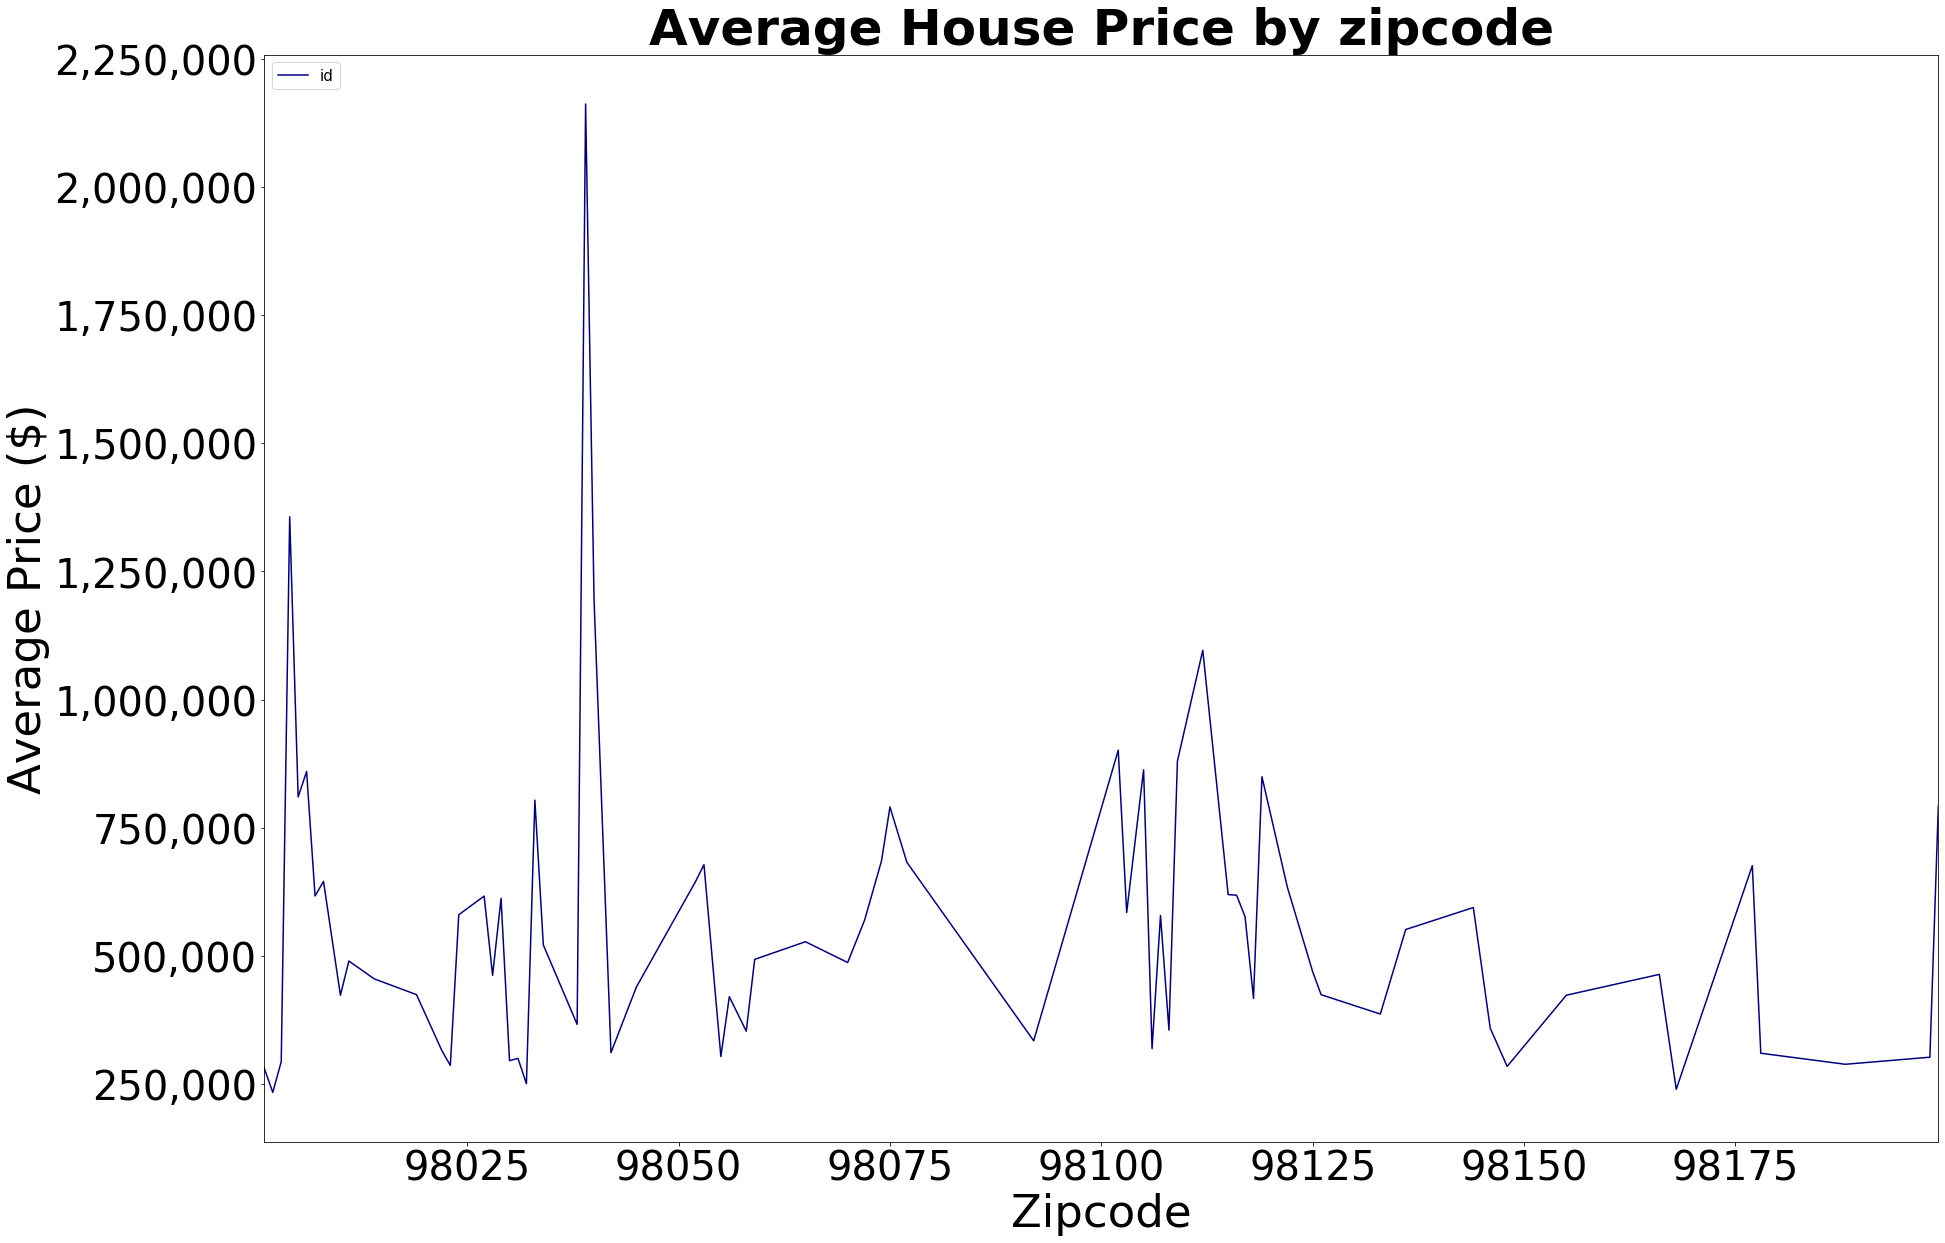

Current size: [30.0, 20.0]


<Figure size 6480x2880 with 0 Axes>

In [30]:
#Plotting the house prices against zipcodes
byzipcode=df.groupby('zipcode').mean()

ax=byzipcode.plot(kind='line', y='price', color='navy')

fig_size = plt.rcParams["figure.figsize"]
 
x_lim = len(housesalebyymszc.index)
# Chart title
plt.title("Average House Price by zipcode", fontdict = {'fontsize': 50, 'fontweight': 'bold'})
# x label
plt.xlabel("Zipcode", fontdict = {'fontsize': 45})
# y label
plt.ylabel("Average Price ($)", fontdict = {'fontsize': 45})
# legend 
plt.legend(housesalebyymszc, loc=2, prop={'size': 15})
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tick_params(axis='x', labelsize=40)
plt.tick_params(axis='y', labelsize=40)
plt.show()

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 90
fig_size[1] = 40
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('averagepriceinzipcodeoverall.png')

##### The weather dataset has been read and cleaned up to extract the required values.

In [31]:
#reading the weather data which is in the form of a json file
weatherdata = pd.read_json('../Resources/23075d28543cff25d003a483a55b9d88.json')
weatherdata



,city_id,clouds,dt,dt_iso,main,rain,snow,weather,wind
0,5799783,{'all': 1},1356998400,2013-01-01 00:00:00 +0000 UTC,"{'temp': 275.62, 'temp_min': 271.48, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 1, 'deg': 350}"
1,5799783,{'all': 1},1357002000,2013-01-01 01:00:00 +0000 UTC,"{'temp': 275.61, 'temp_min': 273.71, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}"
2,5799783,{'all': 20},1357005600,2013-01-01 02:00:00 +0000 UTC,"{'temp': 274.23, 'temp_min': 270.37, 'temp_max...",NaN,NaN,"[{'id': 801, 'main': 'Clouds', 'description': ...","{'speed': 0, 'deg': 0}"
3,5799783,{'all': 1},1357009200,2013-01-01 03:00:00 +0000 UTC,"{'temp': 273.95, 'temp_min': 270.37, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}"
4,5799783,{'all': 75},1357012800,2013-01-01 04:00:00 +0000 UTC,"{'temp': 273.55, 'temp_min': 269.82, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}"
5,5799783,{'all': 90},1357016400,2013-01-01 05:00:00 +0000 UTC,"{'temp': 273.38, 'temp_min': 269.82, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}"
6,5799783,{'all': 1},1357020000,2013-01-01 06:00:00 +0000 UTC,"{'temp': 273.3, 'temp_min': 269.26, 'temp_max'...","{'1h': 0, 'today': 0}",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 52}"
7,5799783,{'all': 90},1357023600,2013-01-01 07:00:00 +0000 UTC,"{'temp': 272.46, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 1, 'deg': 160}"
8,5799783,{'all': 20},1357027200,2013-01-01 08:00:00 +0000 UTC,"{'temp': 272.61, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}"
9,5799783,{'all': 1},1357030800,2013-01-01 09:00:00 +0000 UTC,"{'temp': 272.54, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}"


In [32]:
#Normalizing the date with the house sales dataset
date=[]
num = 0
for index, row in weatherdata.iterrows():
    sdate = weatherdata['dt_iso'].str.split(" ")[num][0]
    date.append(sdate)
    num = num + 1

In [33]:
#Adding the normalized date as a new column to dataset
weatherdata['date']= date
weatherdata

,city_id,clouds,dt,dt_iso,main,rain,snow,weather,wind,date
0,5799783,{'all': 1},1356998400,2013-01-01 00:00:00 +0000 UTC,"{'temp': 275.62, 'temp_min': 271.48, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 1, 'deg': 350}",2013-01-01
1,5799783,{'all': 1},1357002000,2013-01-01 01:00:00 +0000 UTC,"{'temp': 275.61, 'temp_min': 273.71, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}",2013-01-01
2,5799783,{'all': 20},1357005600,2013-01-01 02:00:00 +0000 UTC,"{'temp': 274.23, 'temp_min': 270.37, 'temp_max...",NaN,NaN,"[{'id': 801, 'main': 'Clouds', 'description': ...","{'speed': 0, 'deg': 0}",2013-01-01
3,5799783,{'all': 1},1357009200,2013-01-01 03:00:00 +0000 UTC,"{'temp': 273.95, 'temp_min': 270.37, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01
4,5799783,{'all': 75},1357012800,2013-01-01 04:00:00 +0000 UTC,"{'temp': 273.55, 'temp_min': 269.82, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01
5,5799783,{'all': 90},1357016400,2013-01-01 05:00:00 +0000 UTC,"{'temp': 273.38, 'temp_min': 269.82, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01
6,5799783,{'all': 1},1357020000,2013-01-01 06:00:00 +0000 UTC,"{'temp': 273.3, 'temp_min': 269.26, 'temp_max'...","{'1h': 0, 'today': 0}",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 52}",2013-01-01
7,5799783,{'all': 90},1357023600,2013-01-01 07:00:00 +0000 UTC,"{'temp': 272.46, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 1, 'deg': 160}",2013-01-01
8,5799783,{'all': 20},1357027200,2013-01-01 08:00:00 +0000 UTC,"{'temp': 272.61, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01
9,5799783,{'all': 1},1357030800,2013-01-01 09:00:00 +0000 UTC,"{'temp': 272.54, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}",2013-01-01


In [34]:
#Sorting the values on the basis of date
weatherdata.sort_values('date')


,city_id,clouds,dt,dt_iso,main,rain,snow,weather,wind,date
0,5799783,{'all': 1},1356998400,2013-01-01 00:00:00 +0000 UTC,"{'temp': 275.62, 'temp_min': 271.48, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 1, 'deg': 350}",2013-01-01
23,5799783,{'all': 90},1357081200,2013-01-01 23:00:00 +0000 UTC,"{'temp': 276.67, 'temp_min': 275.37, 'temp_max...",NaN,NaN,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'speed': 1, 'deg': 320}",2013-01-01
22,5799783,{'all': 75},1357077600,2013-01-01 22:00:00 +0000 UTC,"{'temp': 275.94, 'temp_min': 270.93, 'temp_max...",NaN,NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 0, 'deg': 0}",2013-01-01
21,5799783,{'all': 90},1357074000,2013-01-01 21:00:00 +0000 UTC,"{'temp': 275.66, 'temp_min': 272.04, 'temp_max...",NaN,NaN,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'speed': 1, 'deg': 290}",2013-01-01
20,5799783,{'all': 1},1357070400,2013-01-01 20:00:00 +0000 UTC,"{'temp': 275.39, 'temp_min': 272.04, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}",2013-01-01
19,5799783,{'all': 1},1357066800,2013-01-01 19:00:00 +0000 UTC,"{'temp': 274.84, 'temp_min': 272.04, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}",2013-01-01
18,5799783,{'all': 1},1357063200,2013-01-01 18:00:00 +0000 UTC,"{'temp': 274.04, 'temp_min': 269.82, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}",2013-01-01
16,5799783,{'all': 1},1357056000,2013-01-01 16:00:00 +0000 UTC,"{'temp': 272.88, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}",2013-01-01
15,5799783,{'all': 1},1357052400,2013-01-01 15:00:00 +0000 UTC,"{'temp': 272.68, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}",2013-01-01
14,5799783,{'all': 40},1357048800,2013-01-01 14:00:00 +0000 UTC,"{'temp': 272.35, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01


In [35]:
#Extracting temperature, humidity, windspeed, cloudliness and weather condition vlues from json files in the weather dataset
temp=[]
humidity=[]
windspeed = []
clouds = []
weathercondition =[]

num1 = 0
for index, row in weatherdata.iterrows():
    stemp = weatherdata['main'][num1]['temp']
    shumidity = weatherdata['main'][num1]['humidity']
    swind = weatherdata['wind'][num1]['speed']
    sclouds = weatherdata['clouds'][num1]['all']
    sweathercondition = weatherdata['weather'][num1][0]['main']
    temp.append(stemp)
    humidity.append(shumidity)
    windspeed.append(swind)
    clouds.append(sclouds)
    weathercondition.append(sweathercondition)
    num1 = num1 + 1

In [36]:
#Adding the extracted values into the dataset as new columns
weatherdata['Temperature']=temp
weatherdata['Humidity']=humidity
weatherdata['Cloudliness']=clouds
weatherdata['Weather Condition']=weathercondition
weatherdata['Wind Speed']=windspeed
weatherdata

,city_id,clouds,dt,dt_iso,main,rain,snow,weather,wind,date,Temperature,Humidity,Cloudliness,Weather Condition,Wind Speed
0,5799783,{'all': 1},1356998400,2013-01-01 00:00:00 +0000 UTC,"{'temp': 275.62, 'temp_min': 271.48, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 1, 'deg': 350}",2013-01-01,275.6200,93,1,Clear,1
1,5799783,{'all': 1},1357002000,2013-01-01 01:00:00 +0000 UTC,"{'temp': 275.61, 'temp_min': 273.71, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}",2013-01-01,275.6100,93,1,Clear,0
2,5799783,{'all': 20},1357005600,2013-01-01 02:00:00 +0000 UTC,"{'temp': 274.23, 'temp_min': 270.37, 'temp_max...",NaN,NaN,"[{'id': 801, 'main': 'Clouds', 'description': ...","{'speed': 0, 'deg': 0}",2013-01-01,274.2300,93,20,Clouds,0
3,5799783,{'all': 1},1357009200,2013-01-01 03:00:00 +0000 UTC,"{'temp': 273.95, 'temp_min': 270.37, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01,273.9500,0,1,Mist,0
4,5799783,{'all': 75},1357012800,2013-01-01 04:00:00 +0000 UTC,"{'temp': 273.55, 'temp_min': 269.82, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01,273.5500,0,75,Mist,0
5,5799783,{'all': 90},1357016400,2013-01-01 05:00:00 +0000 UTC,"{'temp': 273.38, 'temp_min': 269.82, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01,273.3800,0,90,Mist,0
6,5799783,{'all': 1},1357020000,2013-01-01 06:00:00 +0000 UTC,"{'temp': 273.3, 'temp_min': 269.26, 'temp_max'...","{'1h': 0, 'today': 0}",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 52}",2013-01-01,273.3000,0,1,Clear,0
7,5799783,{'all': 90},1357023600,2013-01-01 07:00:00 +0000 UTC,"{'temp': 272.46, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 1, 'deg': 160}",2013-01-01,272.4600,100,90,Mist,1
8,5799783,{'all': 20},1357027200,2013-01-01 08:00:00 +0000 UTC,"{'temp': 272.61, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01,272.6100,92,20,Mist,0
9,5799783,{'all': 1},1357030800,2013-01-01 09:00:00 +0000 UTC,"{'temp': 272.54, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}",2013-01-01,272.5400,100,1,Clear,0


In [37]:
#Converting the temperature from kelvin to Celcius
tempc = []
num2 = 0
for index, row in weatherdata.iterrows():
    ctemp = weatherdata['Temperature'] - 273.15
    tempc.append(ctemp)
    num2=num2+1

In [38]:
#Adding the temp(C) as a new column to the dataset
weatherdata['Temperature (C)']=tempc[1]
weatherdata

,city_id,clouds,dt,dt_iso,main,rain,snow,weather,wind,date,Temperature,Humidity,Cloudliness,Weather Condition,Wind Speed,Temperature (C)
0,5799783,{'all': 1},1356998400,2013-01-01 00:00:00 +0000 UTC,"{'temp': 275.62, 'temp_min': 271.48, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 1, 'deg': 350}",2013-01-01,275.6200,93,1,Clear,1,2.4700
1,5799783,{'all': 1},1357002000,2013-01-01 01:00:00 +0000 UTC,"{'temp': 275.61, 'temp_min': 273.71, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}",2013-01-01,275.6100,93,1,Clear,0,2.4600
2,5799783,{'all': 20},1357005600,2013-01-01 02:00:00 +0000 UTC,"{'temp': 274.23, 'temp_min': 270.37, 'temp_max...",NaN,NaN,"[{'id': 801, 'main': 'Clouds', 'description': ...","{'speed': 0, 'deg': 0}",2013-01-01,274.2300,93,20,Clouds,0,1.0800
3,5799783,{'all': 1},1357009200,2013-01-01 03:00:00 +0000 UTC,"{'temp': 273.95, 'temp_min': 270.37, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01,273.9500,0,1,Mist,0,0.8000
4,5799783,{'all': 75},1357012800,2013-01-01 04:00:00 +0000 UTC,"{'temp': 273.55, 'temp_min': 269.82, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01,273.5500,0,75,Mist,0,0.4000
5,5799783,{'all': 90},1357016400,2013-01-01 05:00:00 +0000 UTC,"{'temp': 273.38, 'temp_min': 269.82, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01,273.3800,0,90,Mist,0,0.2300
6,5799783,{'all': 1},1357020000,2013-01-01 06:00:00 +0000 UTC,"{'temp': 273.3, 'temp_min': 269.26, 'temp_max'...","{'1h': 0, 'today': 0}",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 52}",2013-01-01,273.3000,0,1,Clear,0,0.1500
7,5799783,{'all': 90},1357023600,2013-01-01 07:00:00 +0000 UTC,"{'temp': 272.46, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 1, 'deg': 160}",2013-01-01,272.4600,100,90,Mist,1,-0.6900
8,5799783,{'all': 20},1357027200,2013-01-01 08:00:00 +0000 UTC,"{'temp': 272.61, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 701, 'main': 'Mist', 'description': 'm...","{'speed': 0, 'deg': 0}",2013-01-01,272.6100,92,20,Mist,0,-0.5400
9,5799783,{'all': 1},1357030800,2013-01-01 09:00:00 +0000 UTC,"{'temp': 272.54, 'temp_min': 269.26, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 0, 'deg': 0}",2013-01-01,272.5400,100,1,Clear,0,-0.6100


In [39]:
#Selecting the columns required and removing the unnecessary columns.
weatherdata = weatherdata[['date', 'Temperature (C)', 'Humidity', 'Cloudliness', 'Weather Condition', 'Wind Speed']]

In [42]:
#Displaying the cleaned weather dataset
weatherdata

,date,Temperature (C),Humidity,Cloudliness,Weather Condition,Wind Speed
0,2013-01-01,2.4700,93,1,Clear,1
1,2013-01-01,2.4600,93,1,Clear,0
2,2013-01-01,1.0800,93,20,Clouds,0
3,2013-01-01,0.8000,0,1,Mist,0
4,2013-01-01,0.4000,0,75,Mist,0
5,2013-01-01,0.2300,0,90,Mist,0
6,2013-01-01,0.1500,0,1,Clear,0
7,2013-01-01,-0.6900,100,90,Mist,1
8,2013-01-01,-0.5400,92,20,Mist,0
9,2013-01-01,-0.6100,100,1,Clear,0


In [43]:
#Sorting on the basis of date
weatherbydateymd = weatherdata.groupby('date').mean()
weatherbydateymd

,Temperature (C),Humidity,Cloudliness,Wind Speed
date,,,,
2013-01-01,0.619583,61.958333,33.416667,0.250000
2013-01-02,0.534167,77.500000,12.291667,1.000000
2013-01-03,0.463750,54.166667,22.708333,2.291667
2013-01-04,1.745833,57.125000,1.000000,1.458333
2013-01-05,3.907366,83.333333,84.375000,1.750000
2013-01-06,5.729167,74.791667,71.125000,1.125000
2013-01-07,4.859167,81.541667,86.041667,1.375000
2013-01-08,6.516604,83.708333,86.333333,2.416667
2013-01-09,7.293958,83.041667,89.041667,2.458333


In [44]:
#Obtaing date in the form of year and month
wdateym=[]
num3 = 0
for index, row in weatherdata.iterrows():
    mdate = weatherdata['date'][num3][0:7]
    wdateym.append(mdate)
    num3 = num3 + 1
    
    

In [45]:
#Adding the date (year and month) to the dataset as a column
weatherdata['date(Y/M)']=wdateym
weatherdata

C:\Users\Kaveh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,Temperature (C),Humidity,Cloudliness,Weather Condition,Wind Speed,date(Y/M)
0,2013-01-01,2.4700,93,1,Clear,1,2013-01
1,2013-01-01,2.4600,93,1,Clear,0,2013-01
2,2013-01-01,1.0800,93,20,Clouds,0,2013-01
3,2013-01-01,0.8000,0,1,Mist,0,2013-01
4,2013-01-01,0.4000,0,75,Mist,0,2013-01
5,2013-01-01,0.2300,0,90,Mist,0,2013-01
6,2013-01-01,0.1500,0,1,Clear,0,2013-01
7,2013-01-01,-0.6900,100,90,Mist,1,2013-01
8,2013-01-01,-0.5400,92,20,Mist,0,2013-01
9,2013-01-01,-0.6100,100,1,Clear,0,2013-01


In [46]:
#Obtaining the average temperature on the bais of year and month
weatherdataym = weatherdata.groupby('date(Y/M)').mean()
weatherdataym

,Temperature (C),Humidity,Cloudliness,Wind Speed
date(Y/M),,,,
2013-01,2.541290,76.581989,64.669355,1.198925
2013-02,6.016165,75.611607,76.558036,1.697917
2013-03,7.138878,66.061828,60.897849,1.041667
2013-04,9.459154,69.781944,58.947222,1.879167
2013-05,13.585724,52.876344,42.327957,1.248656
2013-06,16.259861,60.609722,49.747222,0.800000
2013-07,18.301708,57.524194,8.356183,0.666667
2013-08,17.912518,63.607527,39.805108,0.681452
2013-09,15.300842,80.112500,50.676389,1.115278


In [47]:
#merging the house sales dataset with the weather dataset on the basis of date (y/m/d)
mergedtable =pd.merge(weatherbydateymd, housesalesbydateymd, on ="date", how='outer')
mergedtable.dropna()

,Temperature (C),Humidity,Cloudliness,Wind Speed,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,,
2014-05-02,16.163522,54.875000,18.208333,0.708333,4.088342e+09,5.261918e+05,3.402985,2.138060,2102.835821,15640.477612,...,7.835821,1819.850746,282.985075,1972.850746,29.761194,98075.402985,47.570193,-122.183612,2068.358209,15771.328358
2014-05-03,10.194961,78.625000,82.208333,1.000000,6.709662e+09,4.669700e+05,3.000000,1.812500,1620.000000,8901.000000,...,7.000000,1490.000000,130.000000,1978.750000,0.000000,98067.000000,47.548425,-122.079750,1910.000000,27967.500000
2014-05-04,8.960943,89.458333,91.625000,0.958333,5.848658e+09,5.766900e+05,3.200000,2.400000,2508.000000,7563.000000,...,8.400000,1878.000000,630.000000,1972.400000,0.000000,98089.400000,47.525660,-122.196200,2265.000000,7438.800000
2014-05-05,10.799583,89.541667,88.333333,1.666667,4.571210e+09,5.810577e+05,3.523810,2.193452,2257.845238,17966.309524,...,7.833333,1887.607143,370.238095,1972.857143,141.988095,98079.773810,47.593731,-122.205560,2035.726190,13471.428571
2014-05-06,11.157323,83.708333,38.125000,1.166667,4.553568e+09,5.341684e+05,3.493976,2.171687,2102.168675,12127.662651,...,7.650602,1769.638554,332.530120,1969.108434,193.373494,98080.481928,47.597886,-122.237205,1974.349398,10881.469880
2014-05-07,11.661917,58.625000,11.000000,1.000000,4.290104e+09,5.402663e+05,3.376344,2.193548,2069.537634,19551.172043,...,7.655914,1747.924731,321.612903,1966.301075,128.322581,98081.139785,47.569767,-122.230000,1932.182796,14230.075269
2014-05-08,11.975833,72.416667,68.500000,0.916667,4.575766e+09,5.286861e+05,3.259259,1.996914,1948.283951,20541.148148,...,7.580247,1670.135802,278.148148,1970.604938,98.950617,98078.987654,47.555285,-122.209185,2005.259259,16014.259259
2014-05-09,10.731667,85.625000,61.916667,2.208333,4.888940e+09,5.351328e+05,3.432099,2.253086,2207.506173,22932.037037,...,7.876543,1929.172840,278.333333,1975.185185,123.185185,98064.246914,47.550760,-122.177049,2060.506173,20411.604938
2014-05-10,9.516208,81.083333,67.750000,1.041667,5.638003e+09,4.809700e+05,3.800000,2.150000,2200.000000,6153.400000,...,7.600000,1496.000000,704.000000,1974.200000,401.400000,98090.800000,47.502080,-122.268800,1746.000000,6118.000000


# Plotting the Average House Price per day versus the Cloudliness on that day

##### After removing houses with prices over 12000,000 dollars to remove the bias, the average house prices per each day has been plotted against the average cloudliness on that day. As it can be seen in the scatter graph below to clear correlation exists between the clodliness of and house prices. 

In [48]:
#Eleminating houses with prices over 12000,000 dollars to remove the bias
wdf=mergedtable.loc[mergedtable['price']<1200000]

Current size: [30.0, 20.0]


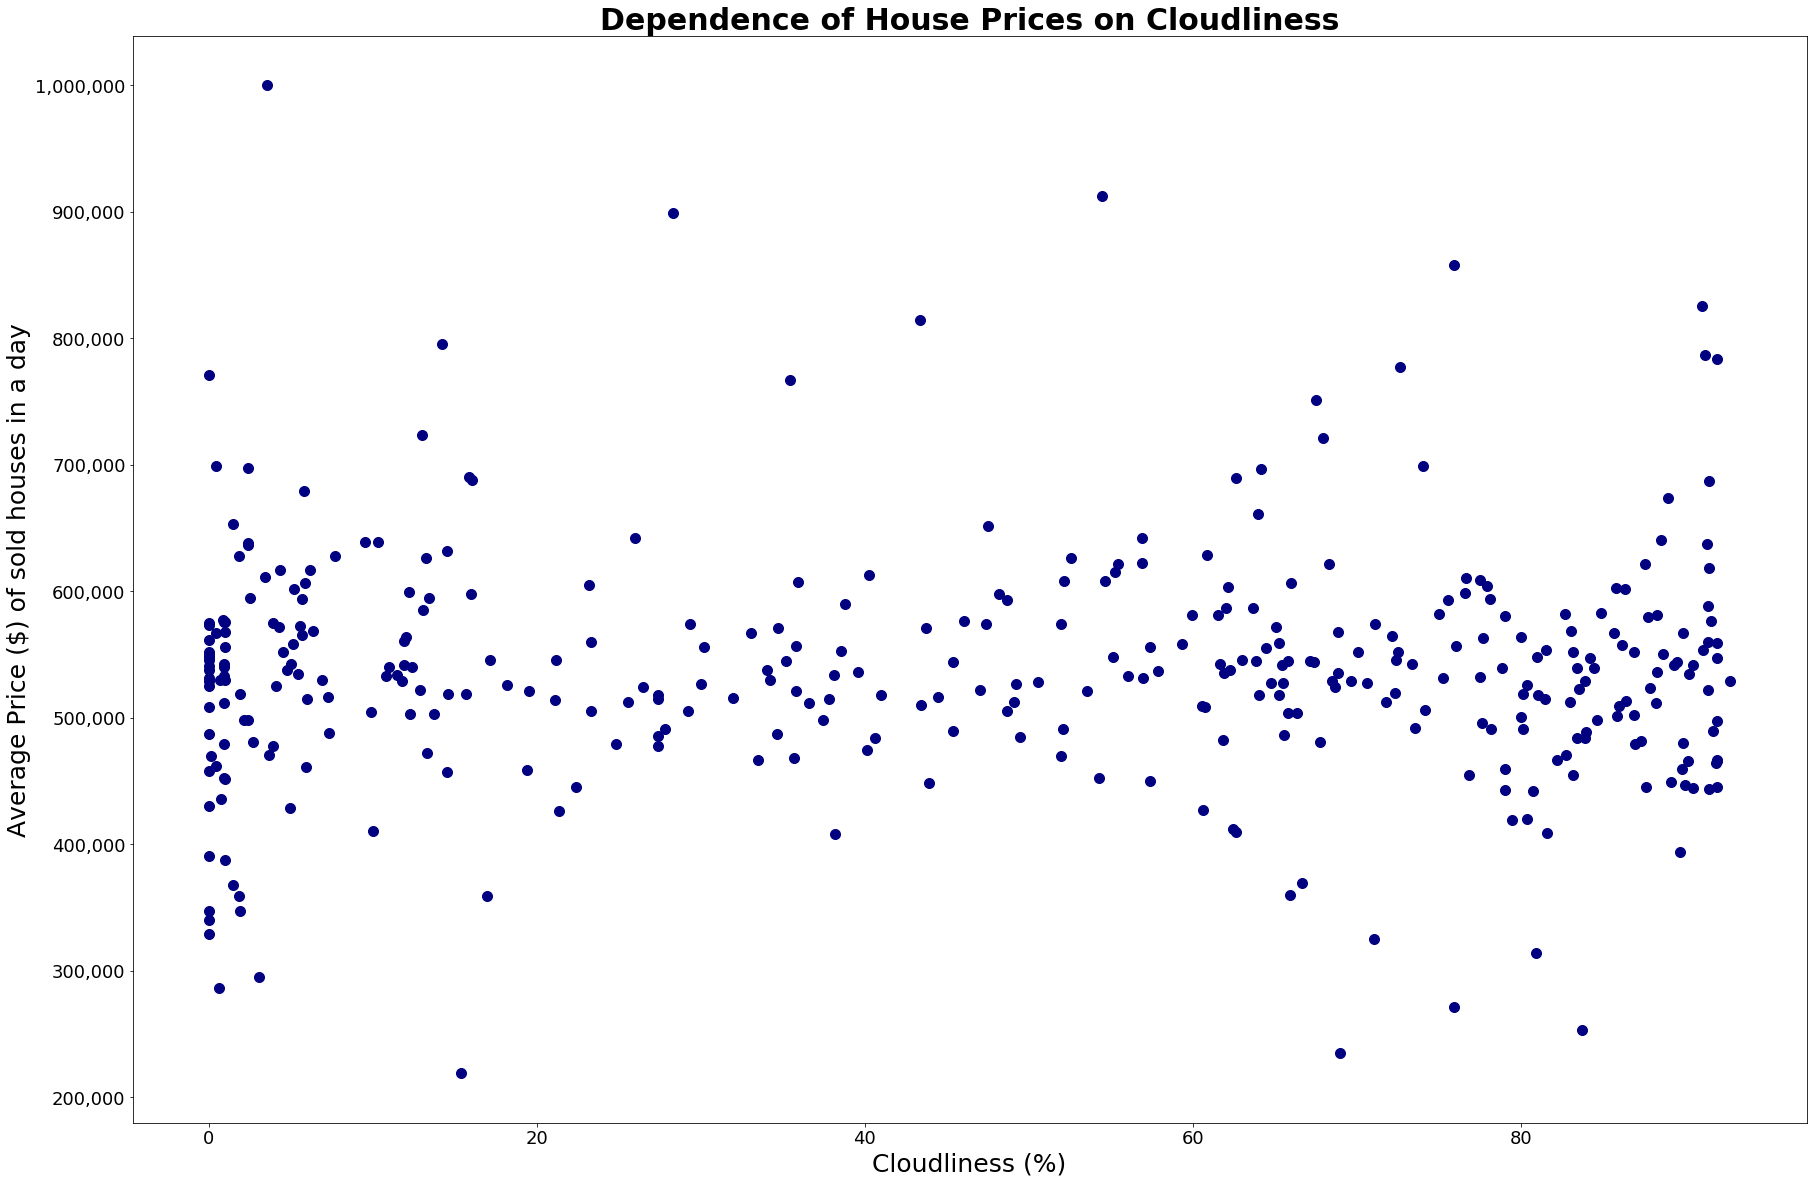

In [51]:
#Plotting average Average Price of houses sold per day against the cloudliness on that day

ax= wdf.plot(x='Cloudliness', y='price', kind='scatter', color='navy', s=100)
x_lim = len(wdf.index)
# Chart title
plt.title("Dependence of House Prices on Cloudliness", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Cloudliness (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Price ($) of sold houses in a day", fontdict = {'fontsize': 25})
# legend 

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('cloudlinessvshouseprices.png')

plt.show()

# Plotting the Average House Price per day versus the Temperature on that day

##### The scatter graph below illustrates that there is no correlation between the house prices and the temperature on the day the houses was sold. The temperatures below zero also have been eleminated to remove the bias.

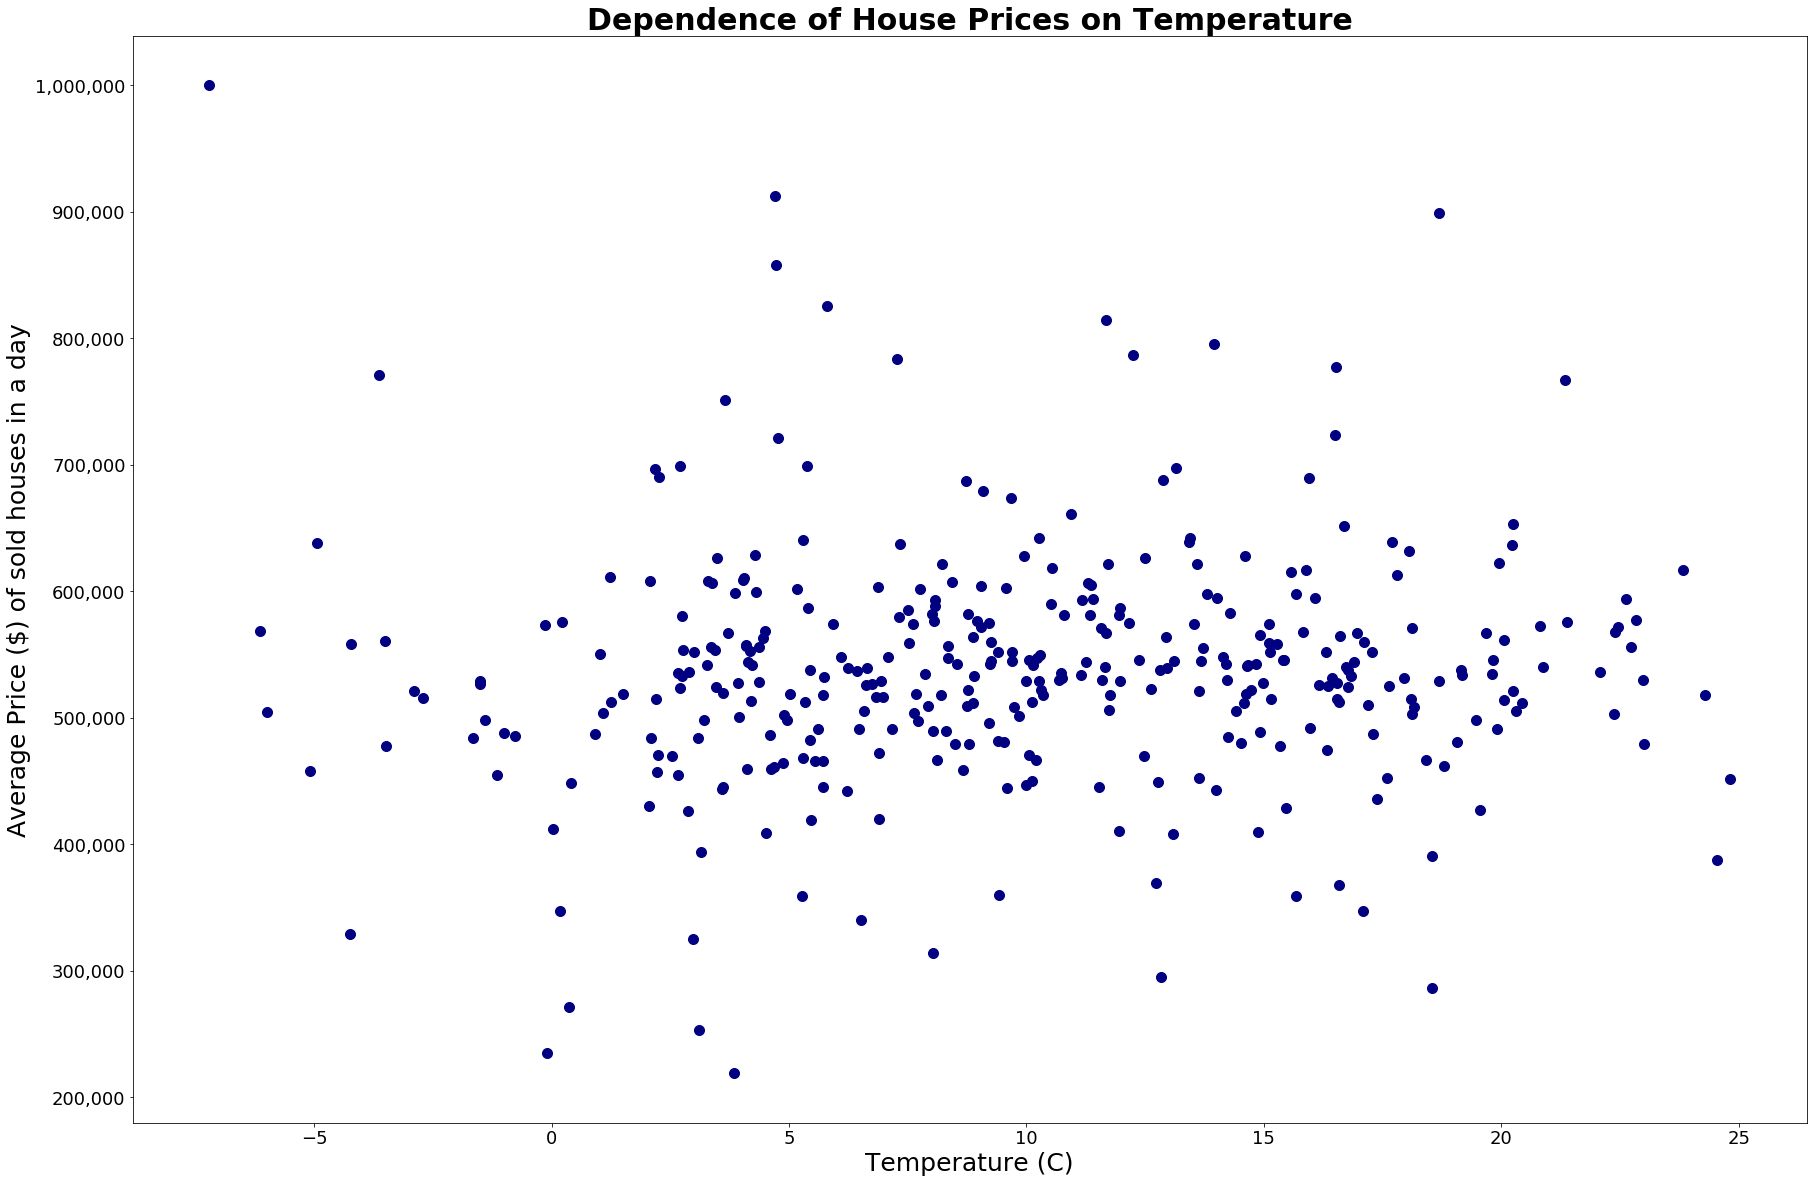

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [52]:
#Plotting average Average Price of houses sold per day against the temperature on that day

ax=wdf.plot(x='Temperature (C)', y='price', kind='scatter', color='navy', s=100)

x_lim = len(wdf.index)
# Chart title
plt.title("Dependence of House Prices on Temperature", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Price ($) of sold houses in a day", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshouseprices.png')


Current size: [30.0, 20.0]


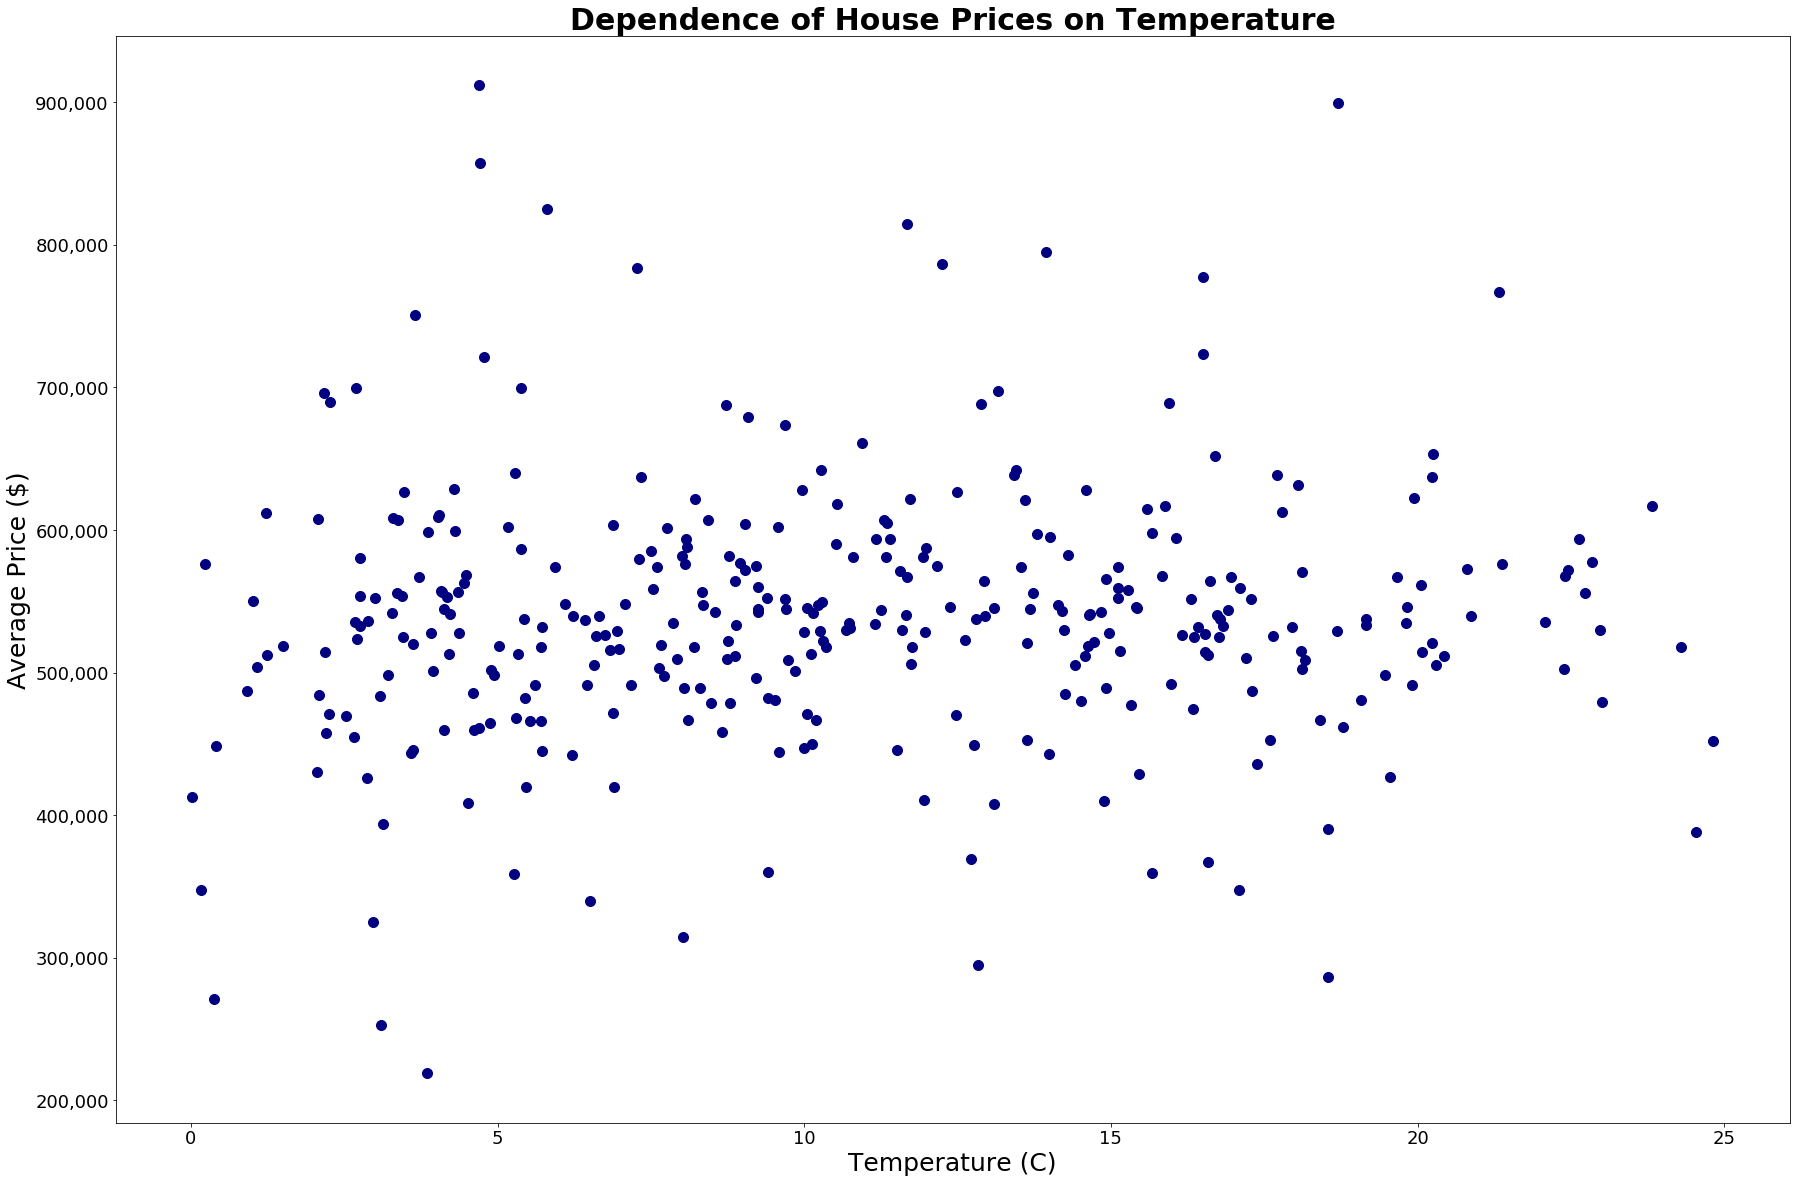

In [54]:
#Plotting average Average Price of houses sold per day against the temperature on that day after removing temperatures below zero as totally 5 days in the whole dataset have temperatures below zero
tempnobias=wdf.loc[wdf['Temperature (C)']>0]
ax=tempnobias.plot(x='Temperature (C)', y='price', kind='scatter', color='navy', s=100)

x_lim = len(tempnobias.index)
# Chart title
plt.title("Dependence of House Prices on Temperature", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Price ($)", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshouseprices.png')

plt.show()

# Plotting the Average House Price per day versus the Humidity on that day

##### The graph below after removing humidities below 50% to eleminate the bias shows that no clear correlation exists between house prices and humidity.

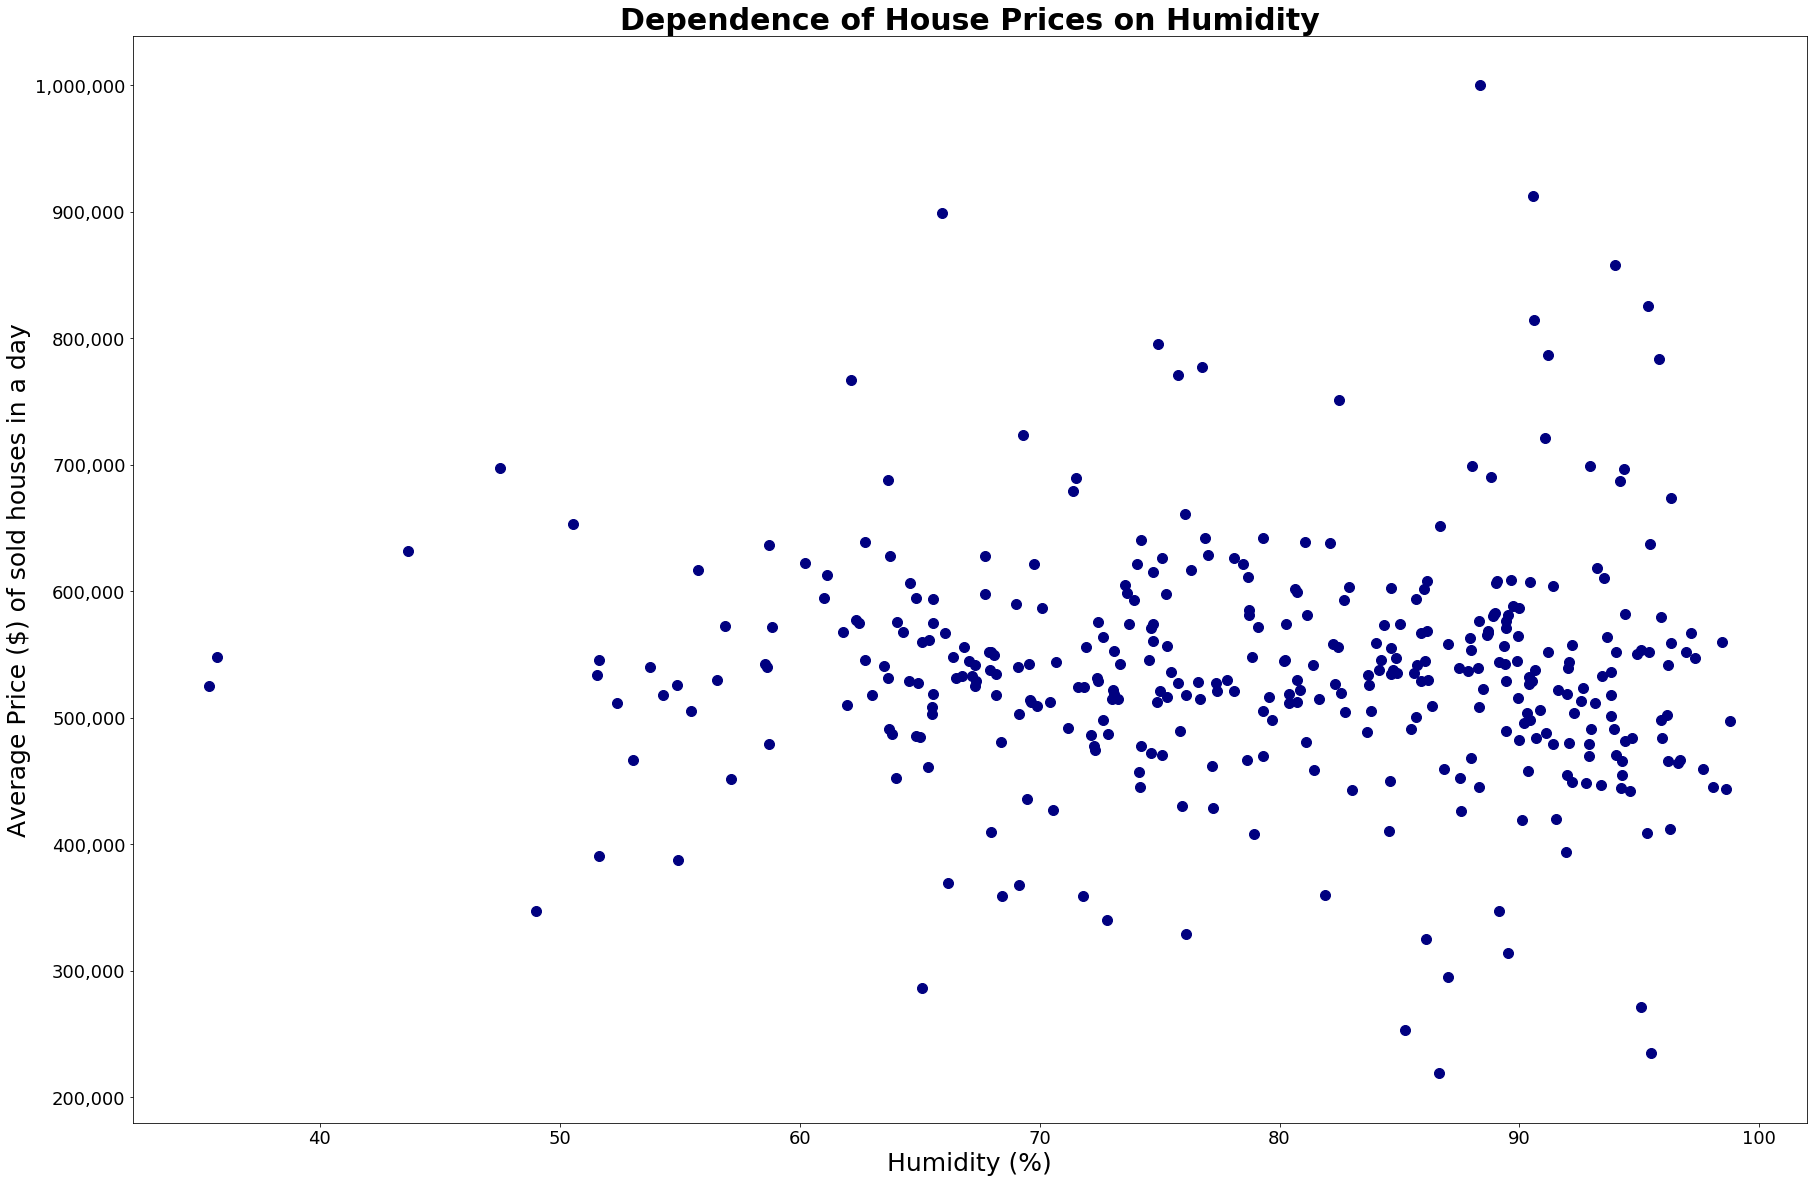

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [55]:
#Plotting average Average Price of houses sold per day against the humidity on that day
ax=wdf.plot(x='Humidity', y='price', kind='scatter', color='navy', s=100)

x_lim = len(wdf.index)
# Chart title
plt.title("Dependence of House Prices on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Price ($) of sold houses in a day", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('humidityvshouseprices.png')


Current size: [30.0, 20.0]


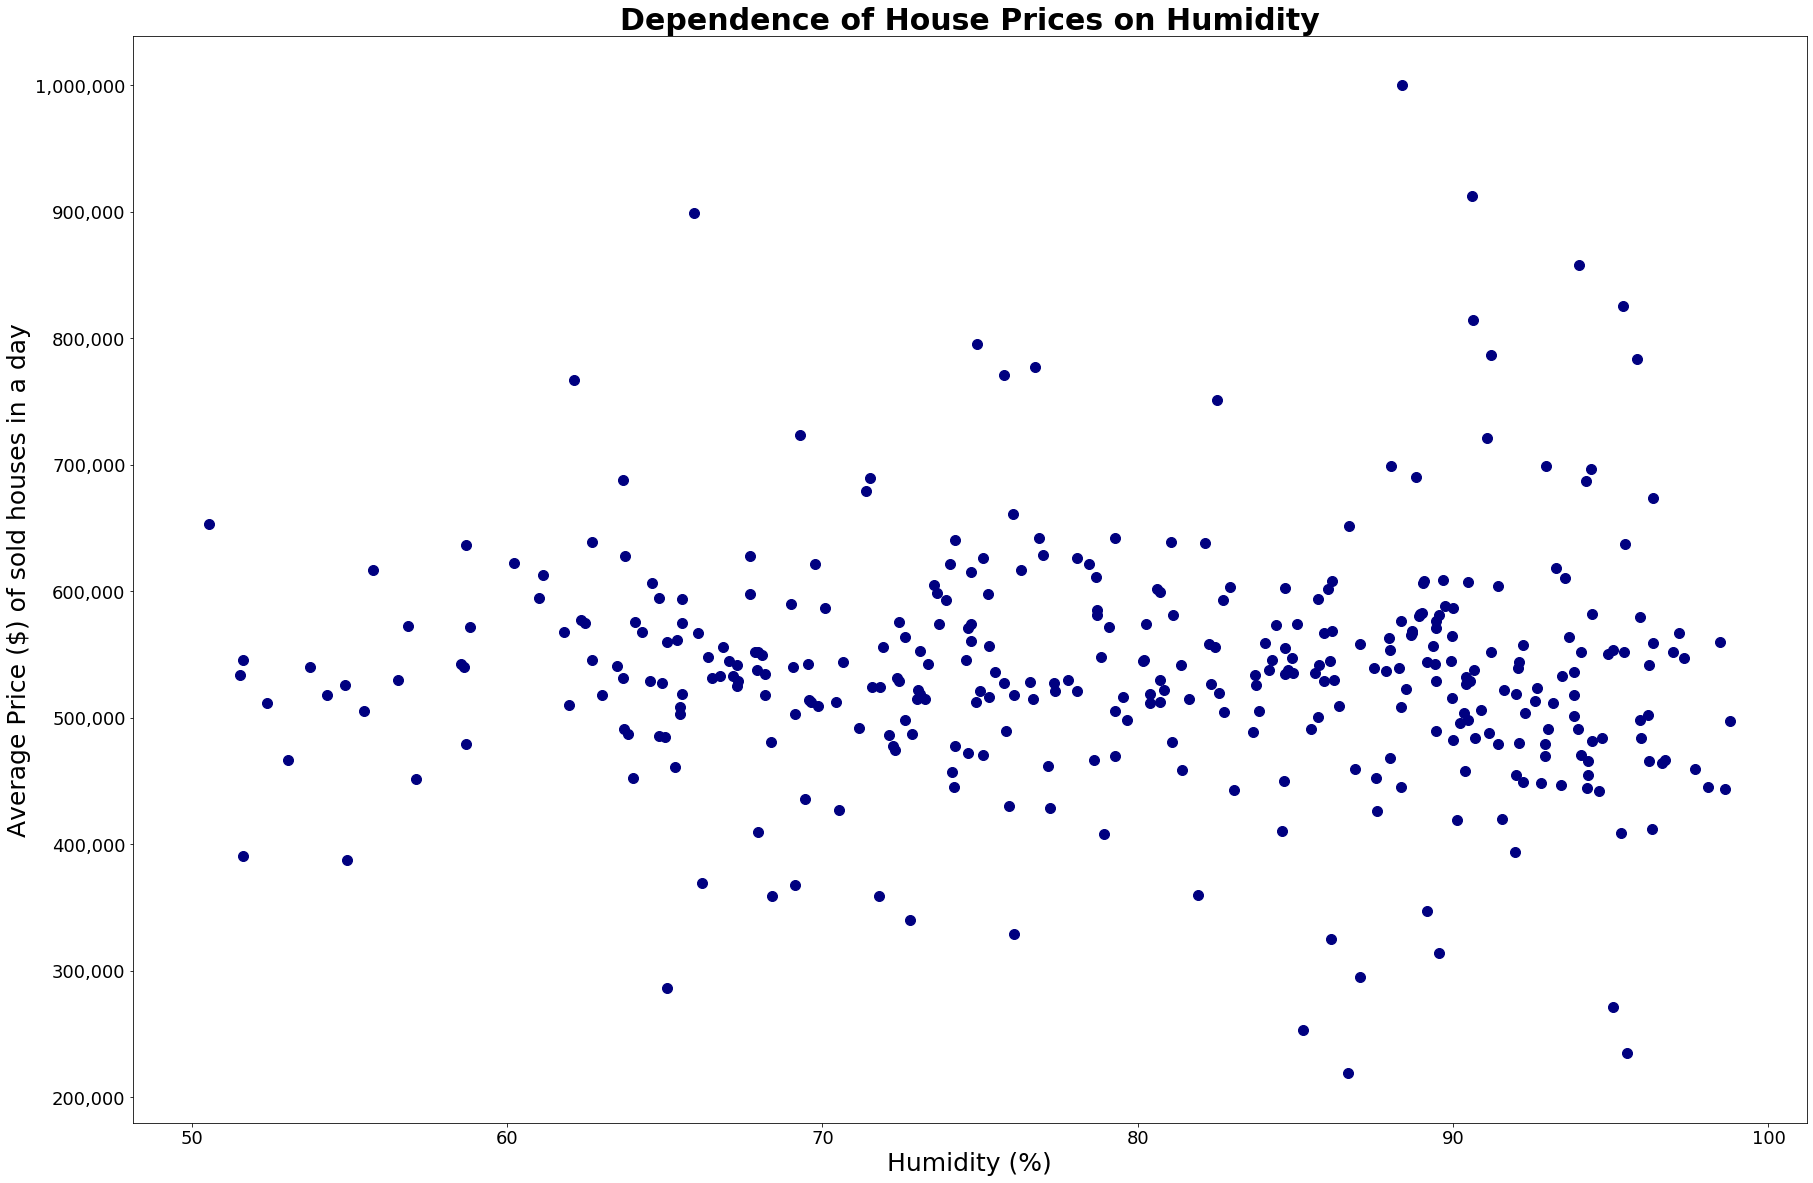

In [58]:
#Plotting average Average Price of houses sold per day against the humidity on that day after removing humidities below 50% to remove the bias
humiditynobiasdf=wdf.loc[wdf['Humidity']>50]
ax=humiditynobiasdf.plot(x='Humidity', y='price', kind='scatter', color='navy', s=100)

x_lim = len(humiditynobiasdf.index)
# Chart title
plt.title("Dependence of House Prices on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Price ($) of sold houses in a day", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('humidityvshouseprices.png')

plt.show()


In [59]:
#Calculating the average number of houses sold per day
housesalescount = df.groupby('date').count()
housesalescount

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date(Y/M),date(Y)
date,,,,,,,,,,,,,,,,,,,,,
2014-05-02,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
2014-05-03,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2014-05-04,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2014-05-05,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
2014-05-06,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
2014-05-07,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
2014-05-08,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
2014-05-09,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
2014-05-10,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [60]:
#combining the house sales (number of sales) dataset with weather dataset
merged2= pd. merge(housesalescount, weatherbydateymd, on="date", how="inner" )
merged2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,date(Y/M),date(Y),Temperature (C),Humidity,Cloudliness,Wind Speed
date,,,,,,,,,,,,,,,,,,,,,
2014-05-02,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,16.163522,54.875000,18.208333,0.708333
2014-05-03,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,10.194961,78.625000,82.208333,1.000000
2014-05-04,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,8.960943,89.458333,91.625000,0.958333
2014-05-05,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,10.799583,89.541667,88.333333,1.666667
2014-05-06,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,11.157323,83.708333,38.125000,1.166667
2014-05-07,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,11.661917,58.625000,11.000000,1.000000
2014-05-08,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,11.975833,72.416667,68.500000,0.916667
2014-05-09,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,10.731667,85.625000,61.916667,2.208333
2014-05-10,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,9.516208,81.083333,67.750000,1.041667


In [61]:
#Selecting the required columns
salescountvsweatherdf = merged2[["id", "Temperature (C)", "Humidity", "Cloudliness", "Wind Speed"]]
salescountvsweatherdf=salescountvsweatherdf.rename(columns={"id" : "Average Number of Houses Sold"})
salescountvsweatherdf

,Average Number of Houses Sold,Temperature (C),Humidity,Cloudliness,Wind Speed
date,,,,,
2014-05-02,67,16.163522,54.875000,18.208333,0.708333
2014-05-03,4,10.194961,78.625000,82.208333,1.000000
2014-05-04,5,8.960943,89.458333,91.625000,0.958333
2014-05-05,84,10.799583,89.541667,88.333333,1.666667
2014-05-06,83,11.157323,83.708333,38.125000,1.166667
2014-05-07,93,11.661917,58.625000,11.000000,1.000000
2014-05-08,81,11.975833,72.416667,68.500000,0.916667
2014-05-09,81,10.731667,85.625000,61.916667,2.208333
2014-05-10,5,9.516208,81.083333,67.750000,1.041667


# Plotting the Average Number of Houses Sold per day versus the Temperature on that day

##### According to the graph btained, no clear correlation exists between the number of houses sold and the temperature. In the second graph the temperatures below zero have been removed to eleminate the bias.

Current size: [30.0, 20.0]


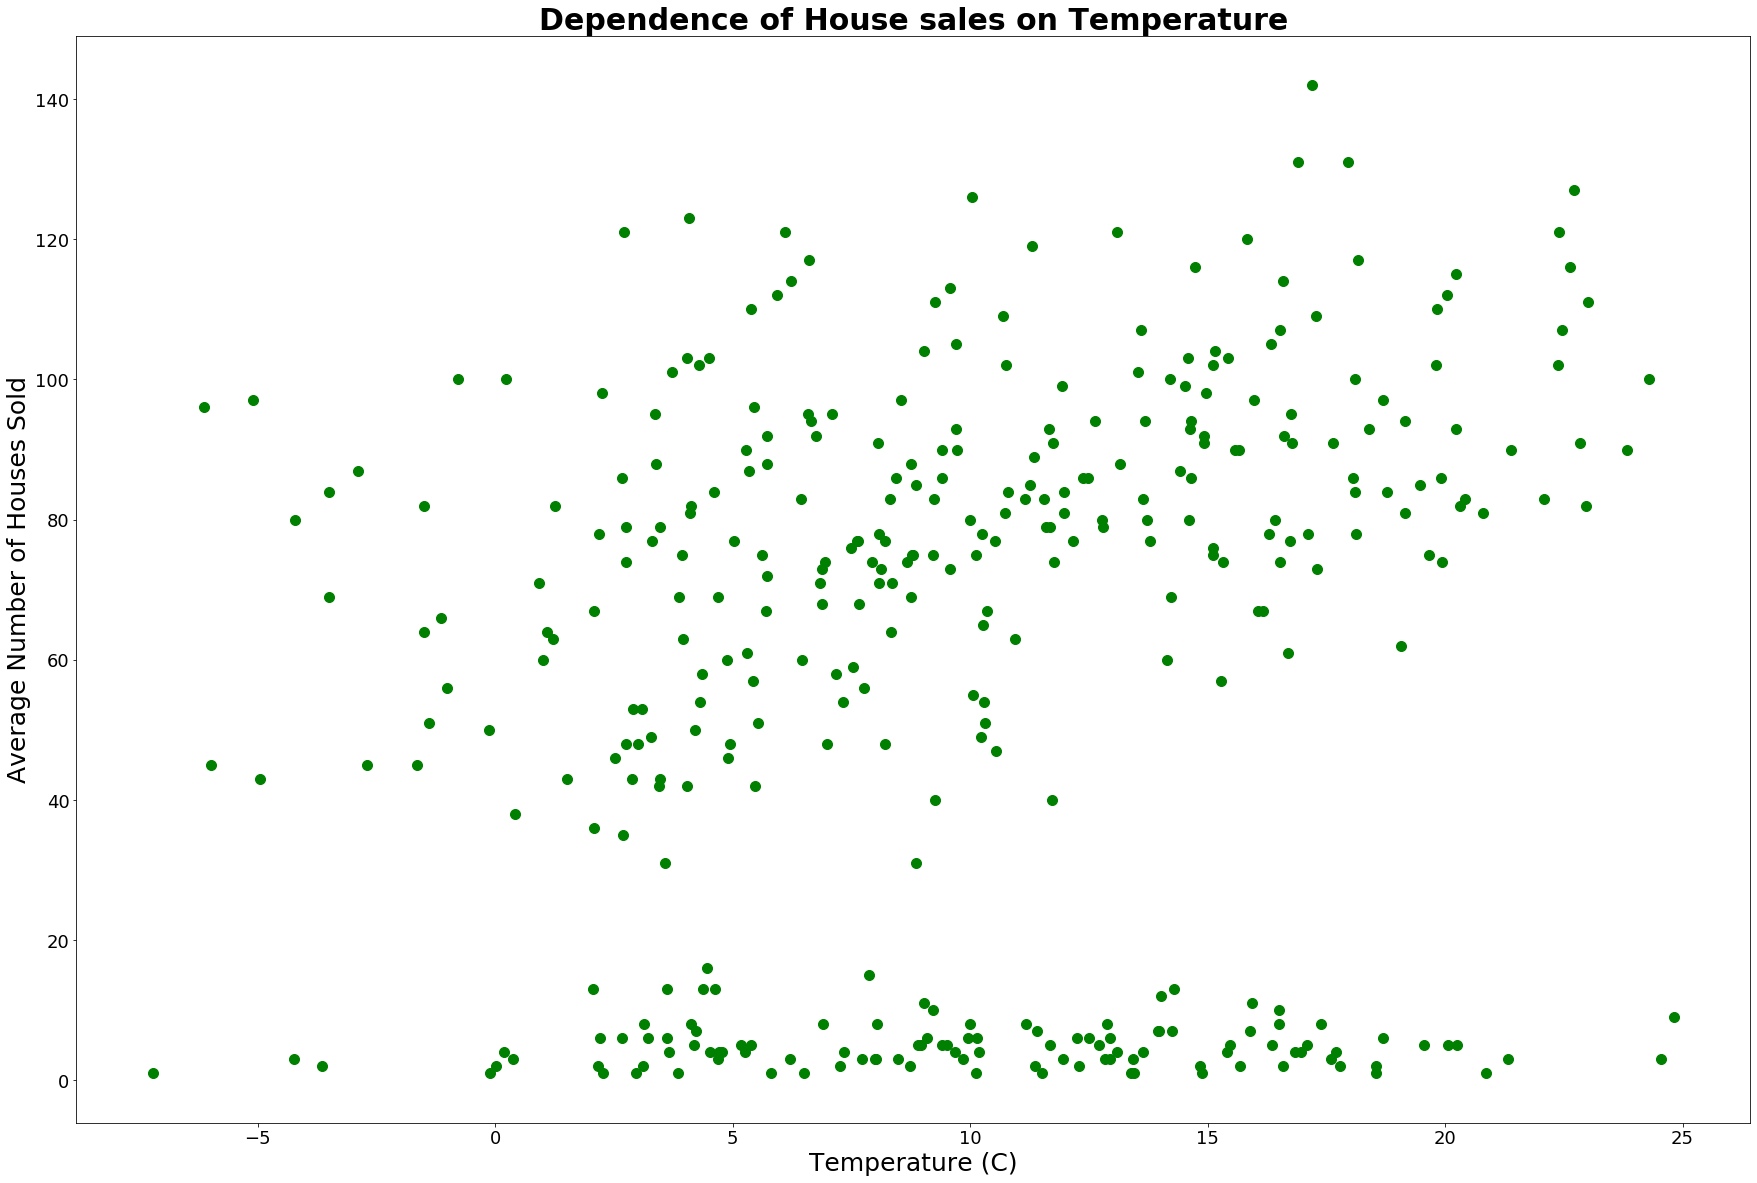

In [76]:
#Plotting the number of houses sold per day against the average temperature on that day
salescountvsweatherdf.plot(kind='scatter', x='Temperature (C)', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Temperature", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)



fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')
plt.show()

Current size: [30.0, 20.0]


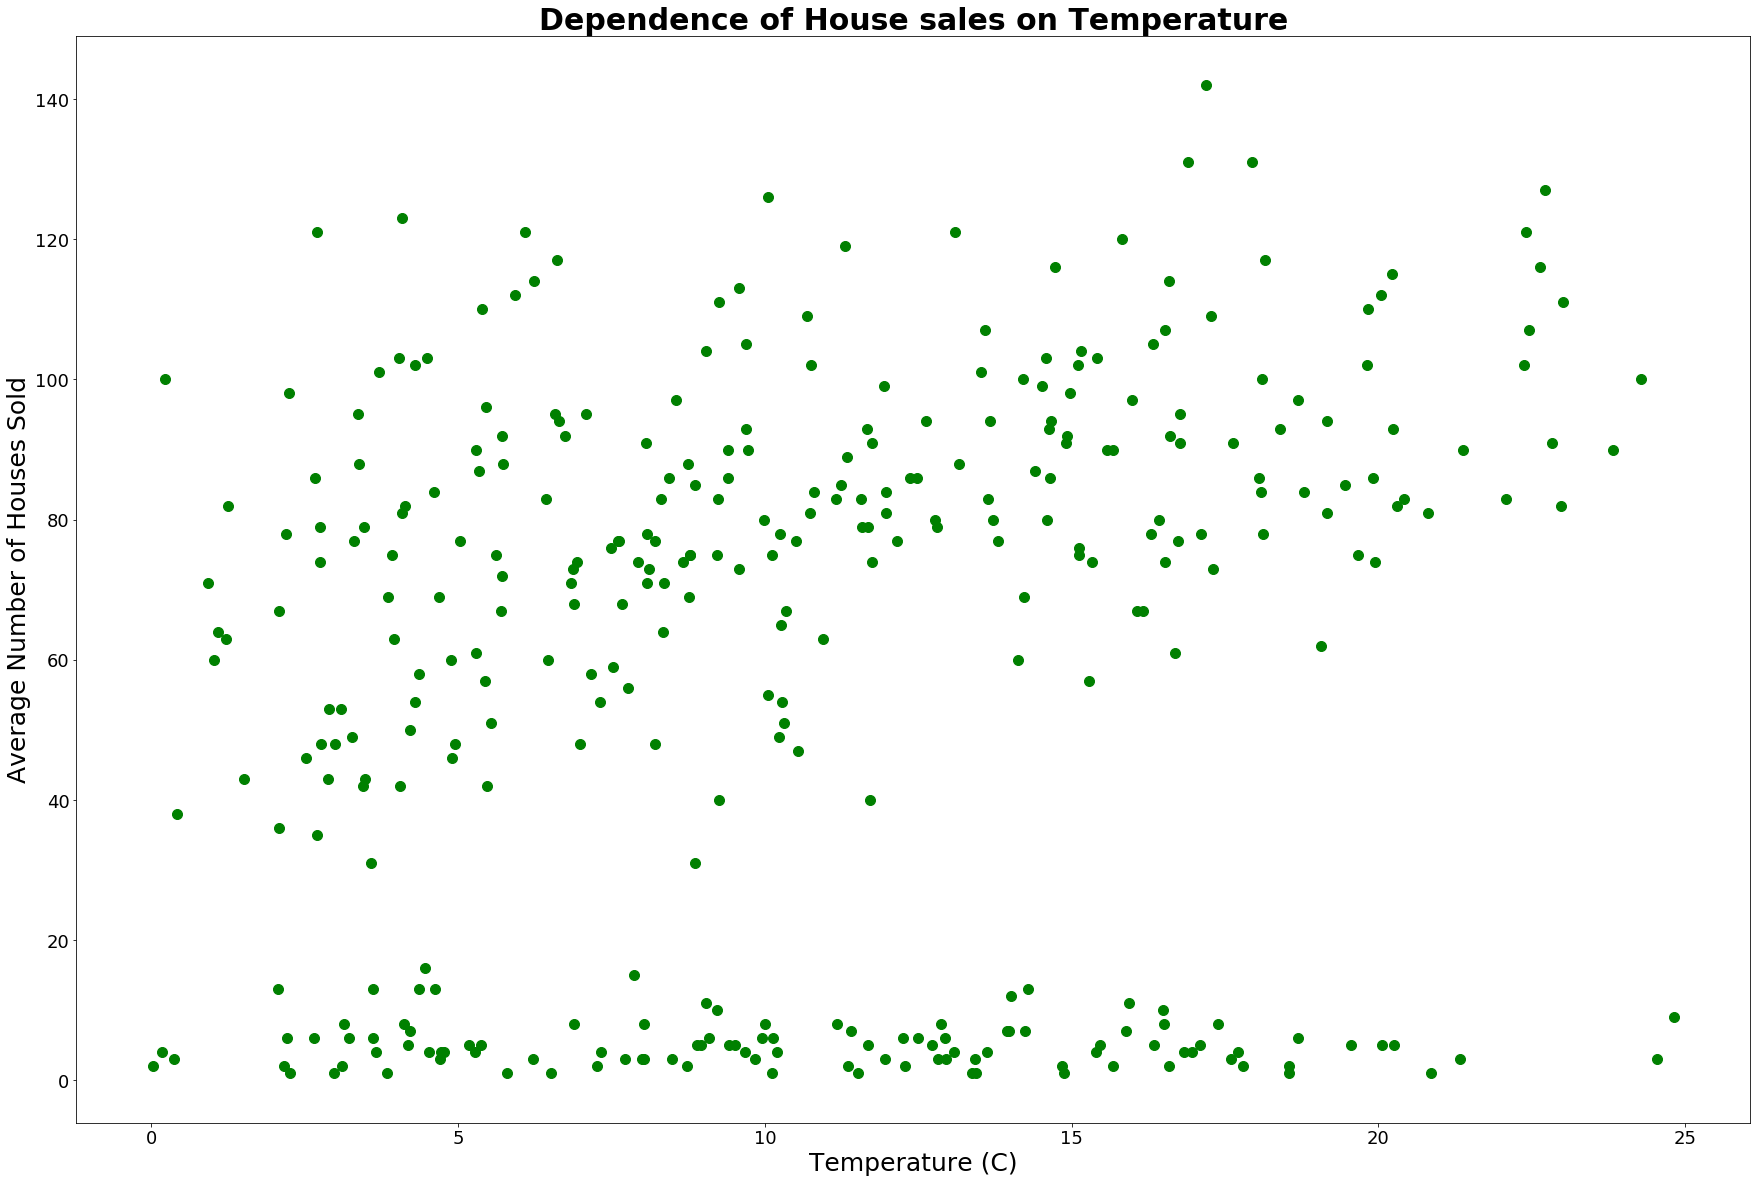

In [77]:
#Plotting the number of houses sold per day against the average temperature on that day after removing temperatures below zero to remove the bias
salescountvsweatherdfnotempbias=salescountvsweatherdf.loc[salescountvsweatherdf['Temperature (C)']>0]
salescountvsweatherdfnotempbias.plot(kind='scatter', x='Temperature (C)', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdfnotempbias.index)
# Chart title
plt.title("Dependence of House sales on Temperature", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)



fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')

plt.show()

# Plotting the Average Number of Houses Sold per day versus the Humidity on that day

##### According to the graph btained, no clear correlation exists between the number of houses sold and the humidity. In the second graph the humidities below 50% have been removed to eleminate the bias.

Current size: [30.0, 20.0]


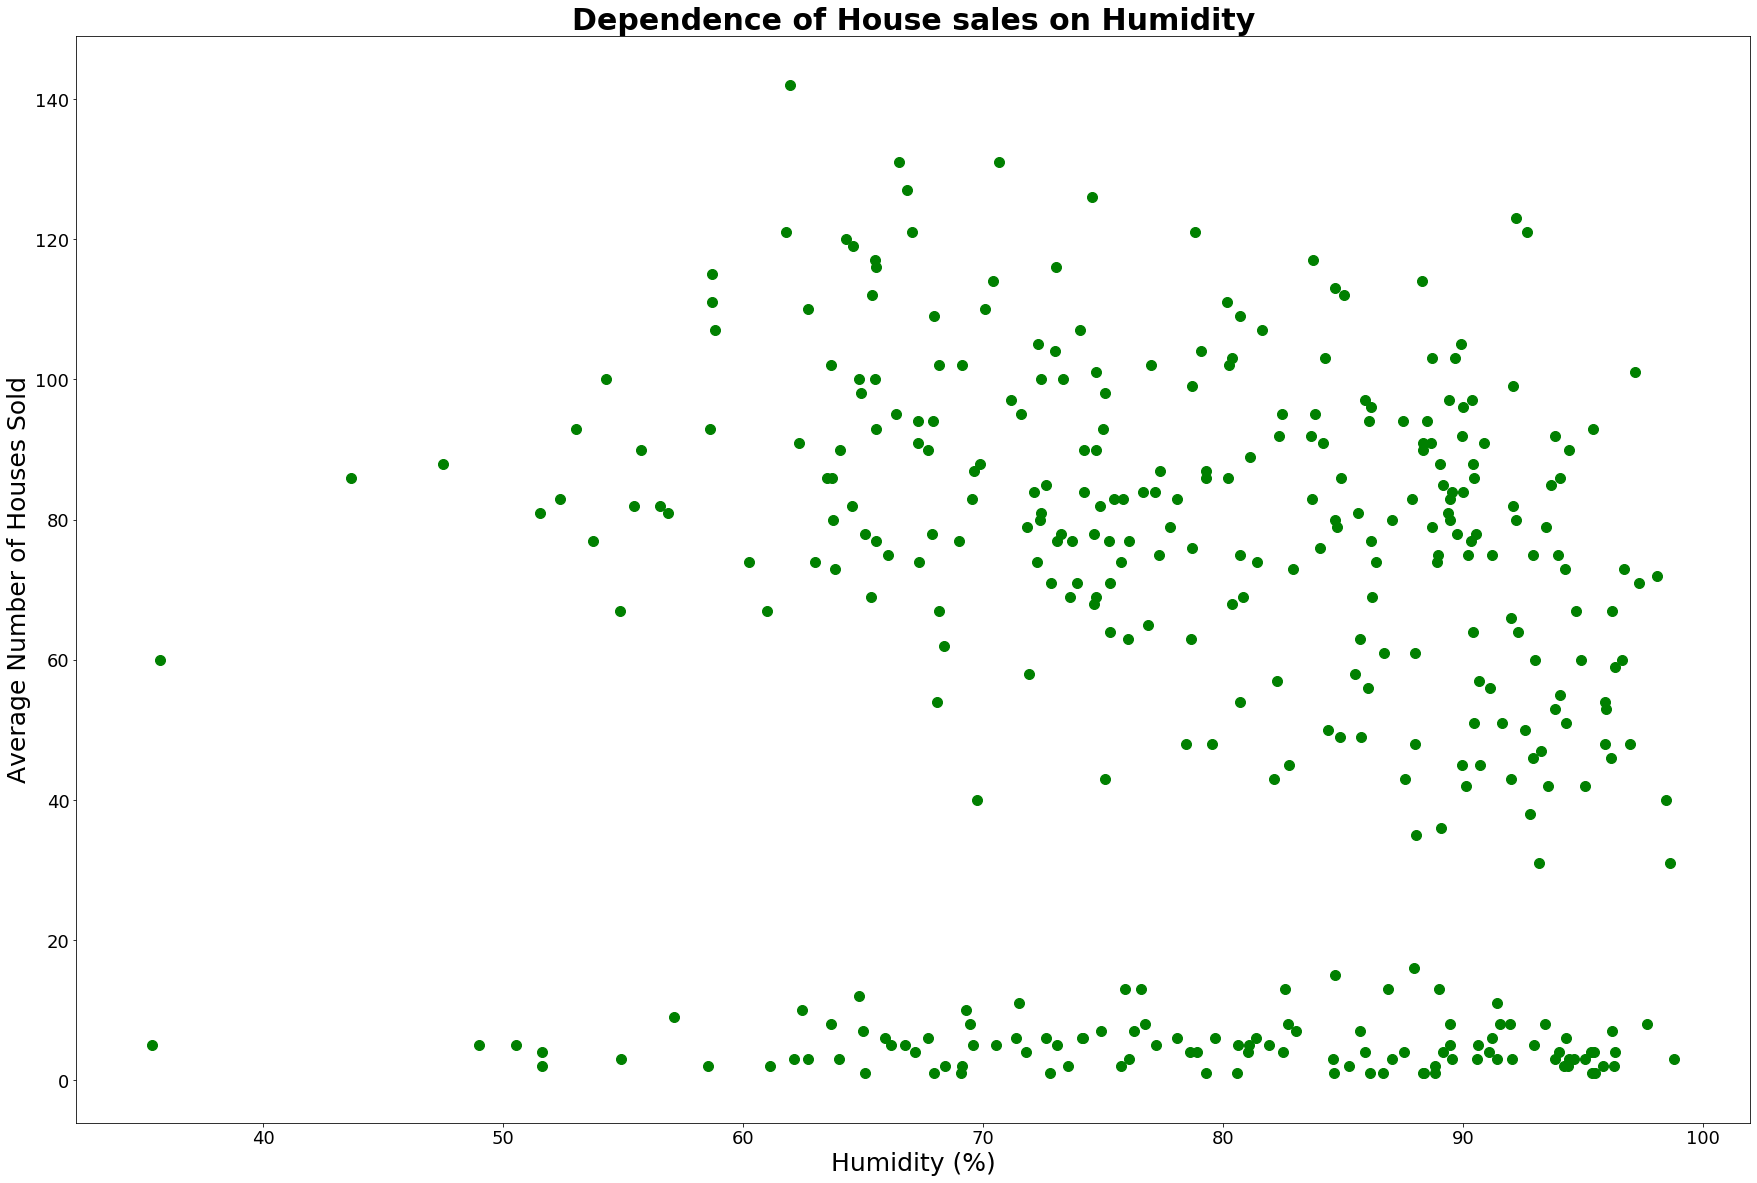

In [78]:
##Plotting the number of houses sold per day against the average humidity on that day
salescountvsweatherdf.plot(kind='scatter', x='Humidity', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('humidityvshousesales.png')
plt.show()

Current size: [30.0, 20.0]


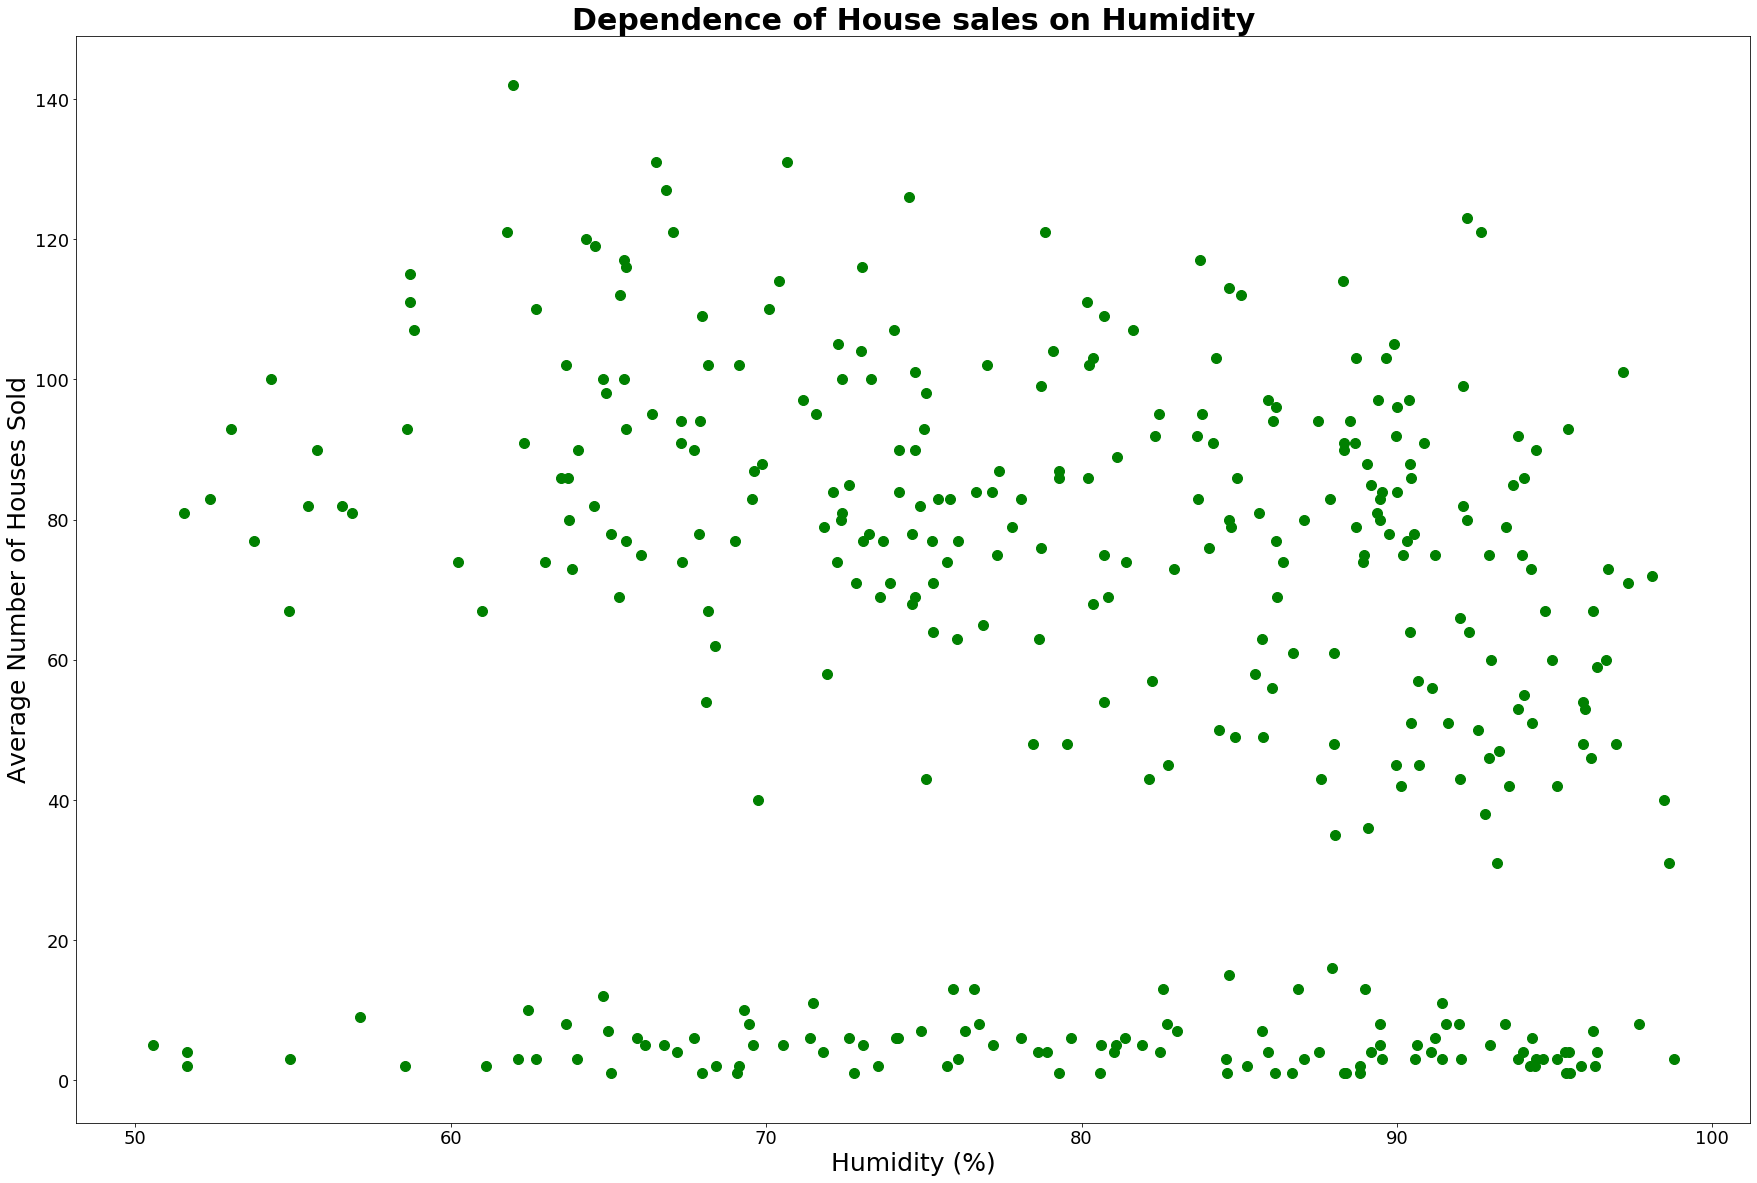

In [79]:
#Plotting the number of houses sold per day against the average humidity on that day after removing humdities below 50% to remove the bias
salescountvsweatherdfnohumdbias=salescountvsweatherdf.loc[salescountvsweatherdf['Humidity']>50]
salescountvsweatherdfnohumdbias.plot(kind='scatter', x='Humidity', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdfnohumdbias.index)
# Chart title
plt.title("Dependence of House sales on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('humidityvshousesales.png')
plt.show()

# Plotting the Average Number of Houses Sold per day versus the Cloudliness on that day

##### According to the graph btained, no clear correlation exists between the number of houses sold and the cloudliness. 

Current size: [30.0, 20.0]


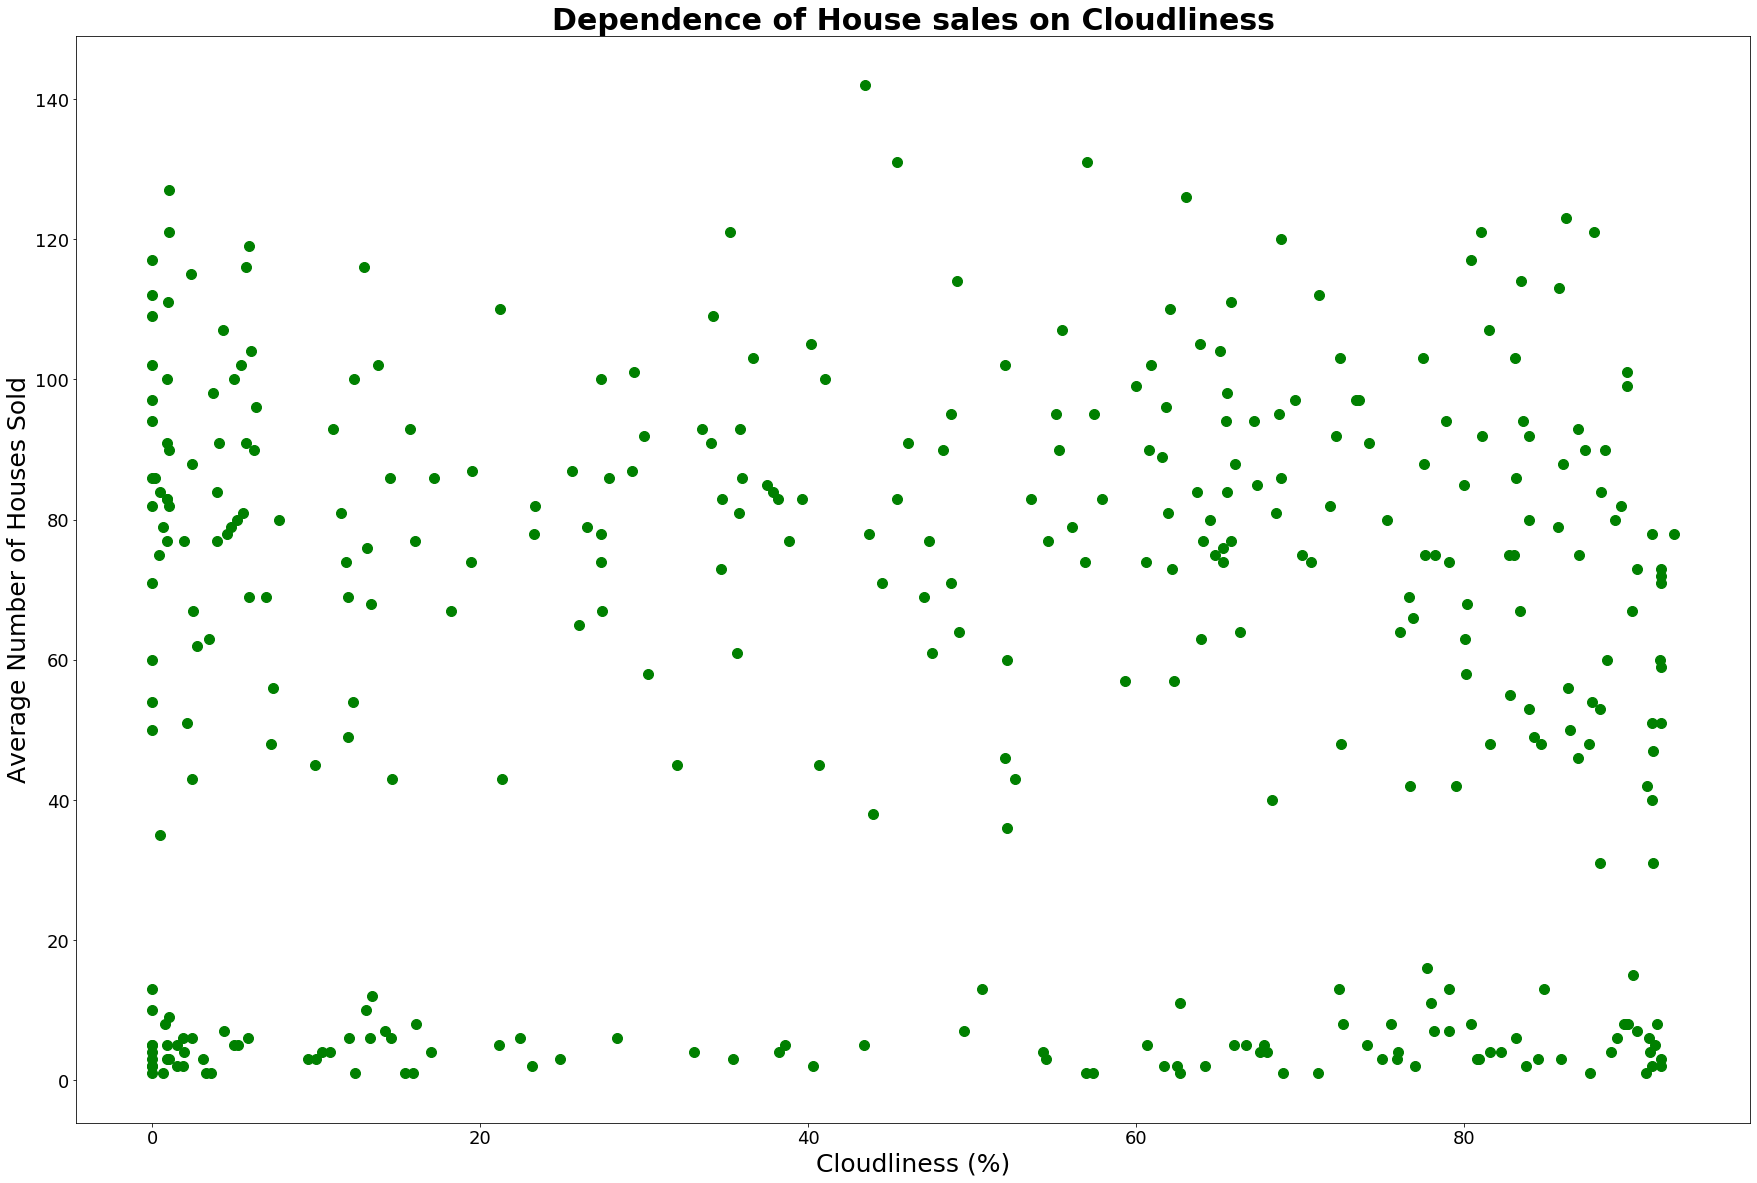

In [80]:
#Plotting the number of houses sold per day against the average cloudliness on that day
salescountvsweatherdf.plot(kind='scatter', x='Cloudliness', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Cloudliness", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Cloudliness (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('cloudlinessvshousesales.png')

plt.show()

In [81]:
#calculating average number of houses sold by year and month
salescountbymonth = df.groupby('date(Y/M)').count()
salescountbymonth = salescountbymonth[['id']]
salescountbymonth = salescountbymonth.rename(columns={'id':'Average Number of the Houses Sold'})
salescountbymonth

,Average Number of the Houses Sold
date(Y/M),
2014-05,1768
2014-06,2180
2014-07,2211
2014-08,1940
2014-09,1774
2014-10,1878
2014-11,1411
2014-12,1471
2015-01,978


# Plotting the Average Number of Houses Sold per each month

##### The graph below shows the number of houses sold in each months in the datasets.

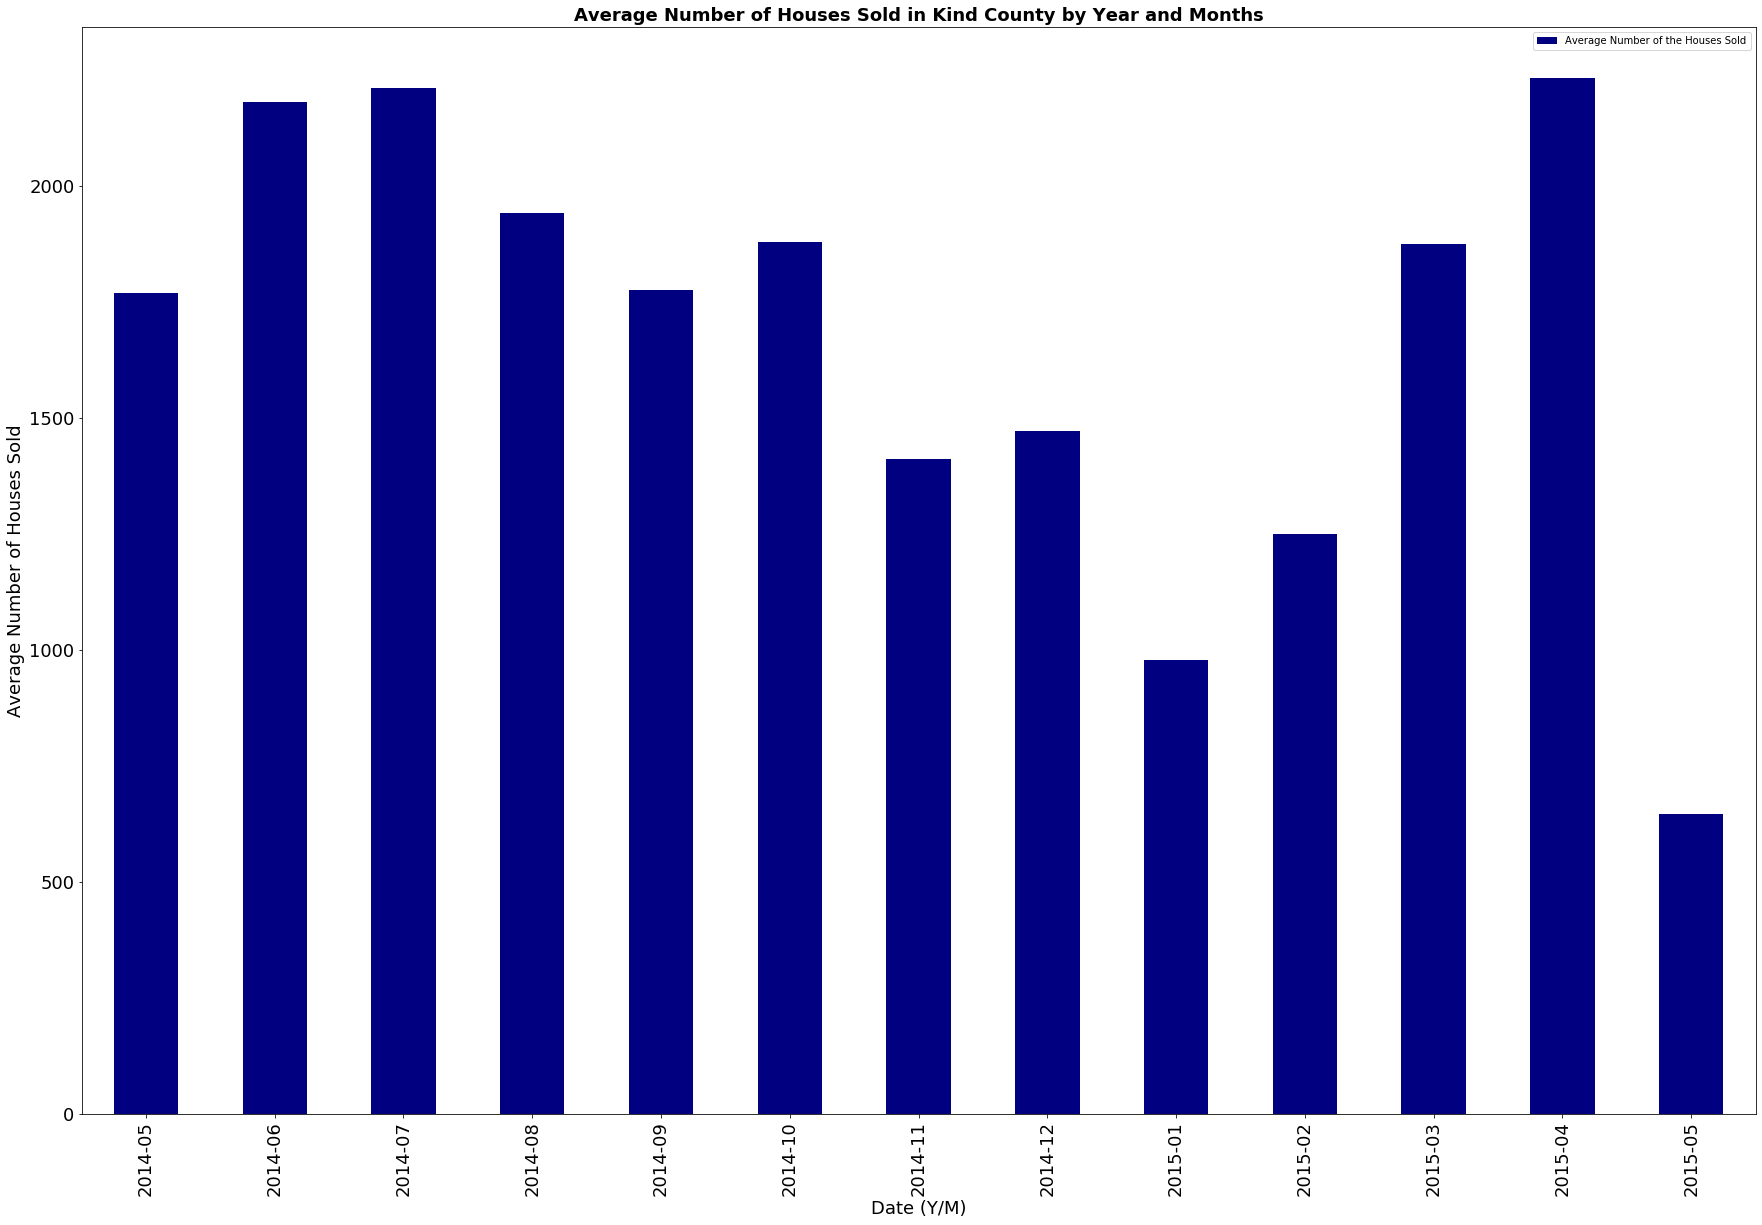

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [82]:
#Plotting average number of houses sold by year and month
salescountbymonth.plot(kind='bar', y='Average Number of the Houses Sold', color='navy')

x_lim = len(salescountbymonth.index)
# Chart title
plt.title("Average Number of Houses Sold in Kind County by Year and Months", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Date (Y/M)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 18})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housessoldbyyearandmonth.png')

In [84]:
#Calculting average price of houses sold by yer and month
averagehousepricebyyearandmonth = df.groupby('date(Y/M)').mean()
averagehousepricebyyearandmonth=averagehousepricebyyearandmonth[['price']]
averagehousepricebyyearandmonth

,price
date(Y/M),
2014-05,548166.600113
2014-06,558123.736239
2014-07,544892.161013
2014-08,536527.039691
2014-09,529315.868095
2014-10,539127.477636
2014-11,522058.861800
2014-12,524602.893270
2015-01,525963.251534


# Plotting the Average House Price per each month

##### The graph below shows the average house price in each month. The average house price is almost steady throughout the year.

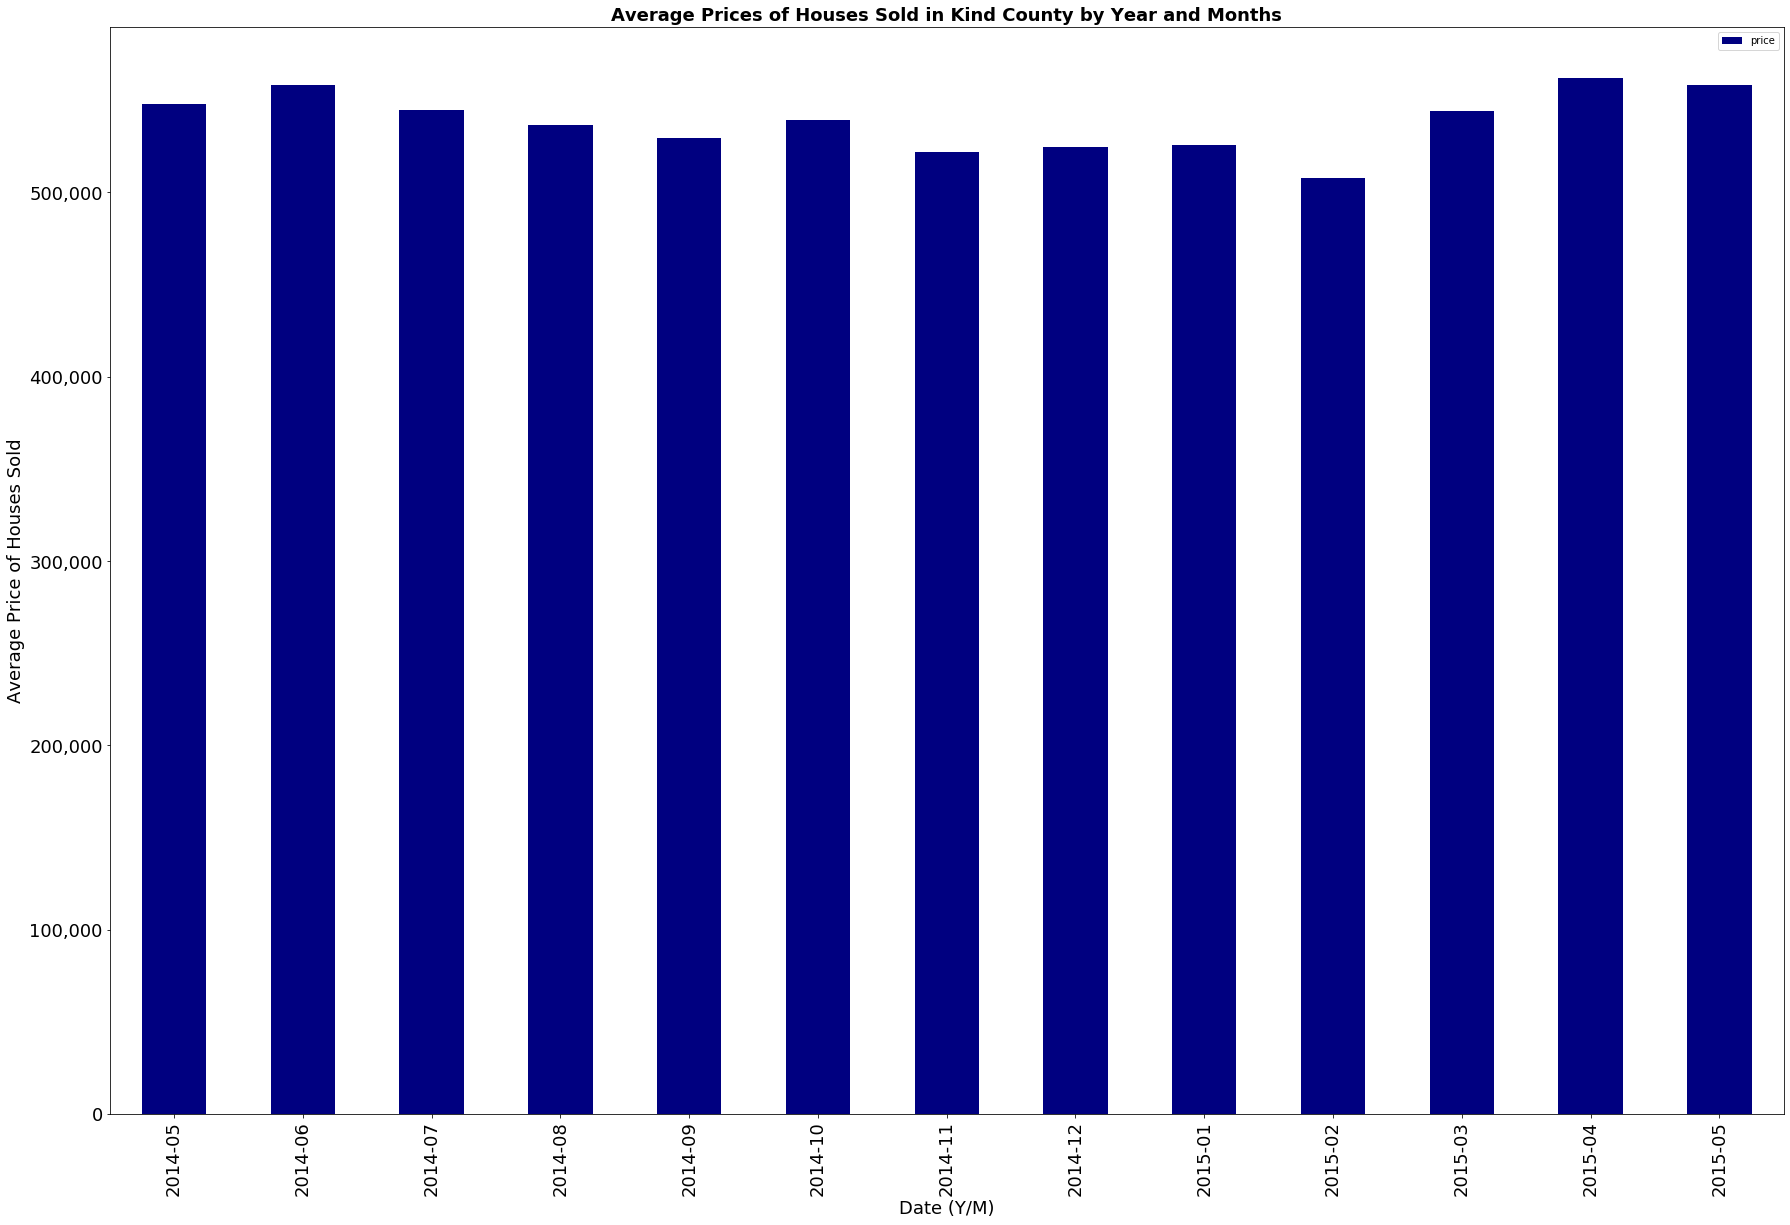

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [85]:
#Plotting the average price of houses sold against year and month
ax=averagehousepricebyyearandmonth.plot(kind='bar', y='price', color='navy')

x_lim = len(averagehousepricebyyearandmonth.index)
# Chart title
plt.title("Average Prices of Houses Sold in Kind County by Year and Months", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Date (Y/M)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Price of Houses Sold", fontdict = {'fontsize': 18})
# legend 
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesbyyearandmonth.png')

In [86]:
#btaining average weather data by year and month
weatherdata.groupby('date(Y/M)').mean()

,Temperature (C),Humidity,Cloudliness,Wind Speed
date(Y/M),,,,
2013-01,2.541290,76.581989,64.669355,1.198925
2013-02,6.016165,75.611607,76.558036,1.697917
2013-03,7.138878,66.061828,60.897849,1.041667
2013-04,9.459154,69.781944,58.947222,1.879167
2013-05,13.585724,52.876344,42.327957,1.248656
2013-06,16.259861,60.609722,49.747222,0.800000
2013-07,18.301708,57.524194,8.356183,0.666667
2013-08,17.912518,63.607527,39.805108,0.681452
2013-09,15.300842,80.112500,50.676389,1.115278


In [87]:
#Displaying we
weatherdata

,date,Temperature (C),Humidity,Cloudliness,Weather Condition,Wind Speed,date(Y/M)
0,2013-01-01,2.4700,93,1,Clear,1,2013-01
1,2013-01-01,2.4600,93,1,Clear,0,2013-01
2,2013-01-01,1.0800,93,20,Clouds,0,2013-01
3,2013-01-01,0.8000,0,1,Mist,0,2013-01
4,2013-01-01,0.4000,0,75,Mist,0,2013-01
5,2013-01-01,0.2300,0,90,Mist,0,2013-01
6,2013-01-01,0.1500,0,1,Clear,0,2013-01
7,2013-01-01,-0.6900,100,90,Mist,1,2013-01
8,2013-01-01,-0.5400,92,20,Mist,0,2013-01
9,2013-01-01,-0.6100,100,1,Clear,0,2013-01


In [88]:
housesalebyymcountzc=df.groupby(['zipcode', 'date(Y/M)']).count()
housesalebyymcountzc.sort_values('id')

id  date  price  bedrooms  bathrooms  sqft_living  \
zipcode date(Y/M)                                                      
98039   2015-05     1     1      1         1          1            1   
98148   2015-01     1     1      1         1          1            1   
98109   2015-05     2     2      2         2          2            2   
98014   2015-05     2     2      2         2          2            2   
98024   2014-12     2     2      2         2          2            2   
98077   2015-05     2     2      2         2          2            2   
98148   2014-12     2     2      2         2          2            2   
        2015-02     2     2      2         2          2            2   
        2014-05     3     3      3         3          3            3   
98008   2015-05     3     3      3         3          3            3   
98010   2014-12     3     3      3         3          3            3   
98108   2015-02     3     3      3         3          3            3   
98148   2014-10     3     3      3         3          3            3   
98070   2015-01     3     3      3         3          3            3   
98039   2014-06     3     3      3         3          3            3   
        2015-03     3     3      3         3          3            3   
98014   2015-01     3     3      3         3          3            3   
98039   2015-02     3     3      3         3          3            3   
98188   2015-05     3     3      3         3          3            3   
98024   2015-05     3     3      3         3          3            3   
98109   2015-02     4     4      4         4          4            4   
98007   2015-05     4     4      4         4          4            4   
        2015-01     4     4      4         4          4            4   
98032   2015-05     4     4      4         4          4            4   
98010   2014-06     4     4      4         4          4            4   
98070   2015-02     4     4      4         4          4            4   
98039   2014-09     4     4      4         4          4            4   
98148   2015-03     4     4      4         4          4            4   
        2014-11     4     4      4         4          4            4   
        2014-08     4     4      4         4          4            4   
...                ..   ...    ...       ...        ...          ...   
98115   2014-07    55    55     55        55         55           55   
98117   2014-09    55    55     55        55         55           55   
98053   2014-07    55    55     55        55         55           55   
98074   2014-08    55    55     55        55         55           55   
98155   2014-06    55    55     55        55         55           55   
98052   2015-04    55    55     55        55         55           55   
98117   2014-05    56    56     56        56         56           56   
98133   2015-04    56    56     56        56         56           56   
98033   2014-07    56    56     56        56         56           56   
98103   2015-04    56    56     56        56         56           56   
98052   2014-08    56    56     56        56         56           56   
        2014-05    56    56     56        56         56           56   
98115   2015-03    58    58     58        58         58           58   
98042   2015-03    59    59     59        59         59           59   
98115   2015-04    59    59     59        59         59           59   
98059   2014-06    59    59     59        59         59           59   
98052   2014-06    59    59     59        59         59           59   
98038   2015-04    60    60     60        60         60           60   
        2014-10    61    61     61        61         61           61   
98117   2014-08    61    61     61        61         61           61   
        2014-06    61    61     61        61         61           61   
98042   2015-04    62    62     62        62         62           62   
98115   2014-05    63    63     63        63         63    

In [89]:
housesalebyycountzc=df.groupby(['zipcode']).count()
housesalebyycountzc.sort_values('id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,date(Y/M),date(Y)
zipcode,,,,,,,,,,,,,,,,,,,,,
98039,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
98148,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
98024,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
98010,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
98102,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105
98109,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
98070,118,118,118,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118
98014,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
98032,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125


In [90]:
biasanalysis=mergedtable.dropna()
biasanalysis

,Temperature (C),Humidity,Cloudliness,Wind Speed,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,,
2014-05-02,16.163522,54.875000,18.208333,0.708333,4.088342e+09,5.261918e+05,3.402985,2.138060,2102.835821,15640.477612,...,7.835821,1819.850746,282.985075,1972.850746,29.761194,98075.402985,47.570193,-122.183612,2068.358209,15771.328358
2014-05-03,10.194961,78.625000,82.208333,1.000000,6.709662e+09,4.669700e+05,3.000000,1.812500,1620.000000,8901.000000,...,7.000000,1490.000000,130.000000,1978.750000,0.000000,98067.000000,47.548425,-122.079750,1910.000000,27967.500000
2014-05-04,8.960943,89.458333,91.625000,0.958333,5.848658e+09,5.766900e+05,3.200000,2.400000,2508.000000,7563.000000,...,8.400000,1878.000000,630.000000,1972.400000,0.000000,98089.400000,47.525660,-122.196200,2265.000000,7438.800000
2014-05-05,10.799583,89.541667,88.333333,1.666667,4.571210e+09,5.810577e+05,3.523810,2.193452,2257.845238,17966.309524,...,7.833333,1887.607143,370.238095,1972.857143,141.988095,98079.773810,47.593731,-122.205560,2035.726190,13471.428571
2014-05-06,11.157323,83.708333,38.125000,1.166667,4.553568e+09,5.341684e+05,3.493976,2.171687,2102.168675,12127.662651,...,7.650602,1769.638554,332.530120,1969.108434,193.373494,98080.481928,47.597886,-122.237205,1974.349398,10881.469880
2014-05-07,11.661917,58.625000,11.000000,1.000000,4.290104e+09,5.402663e+05,3.376344,2.193548,2069.537634,19551.172043,...,7.655914,1747.924731,321.612903,1966.301075,128.322581,98081.139785,47.569767,-122.230000,1932.182796,14230.075269
2014-05-08,11.975833,72.416667,68.500000,0.916667,4.575766e+09,5.286861e+05,3.259259,1.996914,1948.283951,20541.148148,...,7.580247,1670.135802,278.148148,1970.604938,98.950617,98078.987654,47.555285,-122.209185,2005.259259,16014.259259
2014-05-09,10.731667,85.625000,61.916667,2.208333,4.888940e+09,5.351328e+05,3.432099,2.253086,2207.506173,22932.037037,...,7.876543,1929.172840,278.333333,1975.185185,123.185185,98064.246914,47.550760,-122.177049,2060.506173,20411.604938
2014-05-10,9.516208,81.083333,67.750000,1.041667,5.638003e+09,4.809700e+05,3.800000,2.150000,2200.000000,6153.400000,...,7.600000,1496.000000,704.000000,1974.200000,401.400000,98090.800000,47.502080,-122.268800,1746.000000,6118.000000


In [91]:
numberofsalesdays=biasanalysis['Humidity'].count()
numberofsalesdays

372

In [92]:
weather=weatherbydateymd.reset_index()
weather

,date,Temperature (C),Humidity,Cloudliness,Wind Speed
0,2013-01-01,0.619583,61.958333,33.416667,0.250000
1,2013-01-02,0.534167,77.500000,12.291667,1.000000
2,2013-01-03,0.463750,54.166667,22.708333,2.291667
3,2013-01-04,1.745833,57.125000,1.000000,1.458333
4,2013-01-05,3.907366,83.333333,84.375000,1.750000
5,2013-01-06,5.729167,74.791667,71.125000,1.125000
6,2013-01-07,4.859167,81.541667,86.041667,1.375000
7,2013-01-08,6.516604,83.708333,86.333333,2.416667
8,2013-01-09,7.293958,83.041667,89.041667,2.458333
9,2013-01-10,3.797792,83.166667,80.666667,1.916667


In [93]:
mask = (weather['date'] > '2014-05-01') & (weather['date'] <= '2015-05-27')
biasweather=pd.DataFrame(weather.loc[mask])
biasweather

,date,Temperature (C),Humidity,Cloudliness,Wind Speed
486,2014-05-02,16.163522,54.875000,18.208333,0.708333
487,2014-05-03,10.194961,78.625000,82.208333,1.000000
488,2014-05-04,8.960943,89.458333,91.625000,0.958333
489,2014-05-05,10.799583,89.541667,88.333333,1.666667
490,2014-05-06,11.157323,83.708333,38.125000,1.166667
491,2014-05-07,11.661917,58.625000,11.000000,1.000000
492,2014-05-08,11.975833,72.416667,68.500000,0.916667
493,2014-05-09,10.731667,85.625000,61.916667,2.208333
494,2014-05-10,9.516208,81.083333,67.750000,1.041667
495,2014-05-11,11.355417,73.541667,23.166667,1.166667


# Analyzing different biases in the datasets

##### By having a close look at the weather dataset, we can observe that the weather in King County, WA is fairly constant throughout the year. We only have few days with temperatures below zero or humidities below 50% and during all those days house sales has happened. The calculations and the graph below illustrates this bias.

In [94]:
weatherdatadays= biasweather['Temperature (C)'].count()
weatherdatadays

391

In [95]:
abovezerodays=biasweather.loc[biasweather['Temperature (C)']>=0]
numberofabovezerodays=abovezerodays['Temperature (C)'].count()
numberofabovezerodays

369

In [96]:
abovezerosales=biasanalysis.loc[biasanalysis['Temperature (C)']>=0]
numberofabovezerosales=abovezerosales['price'].count()
numberofabovezerosales

351

In [97]:
belowzerodays=biasweather.loc[biasweather['Temperature (C)']<=0]
numberofbelowzerodays=belowzerodays['Temperature (C)'].count()
numberofbelowzerodays

22

In [98]:
belowzerosales=biasanalysis.loc[biasanalysis['Temperature (C)']<=0]
numberofbelowzerosalesdays=belowzerosales['price'].count()
numberofbelowzerosalesdays

21

In [99]:
abovefiftyhdays=biasweather.loc[biasweather['Humidity']>=50]
abovefiftyhumiditydays=abovezerodays['Humidity'].count()
abovefiftyhumiditydays

369

In [100]:
abovefiftyhsales=biasanalysis.loc[biasanalysis['Humidity']>=50]
abovefiftyhumiditysalesdays=abovefiftyhsales['Humidity'].count()
abovefiftyhumiditysalesdays

367

In [101]:
belowfiftyhdays=biasweather.loc[biasweather['Humidity']<=50]
belowfiftyhumiditydays=belowfiftyhdays['Humidity'].count()
belowfiftyhumiditydays

5

In [102]:
belowfiftyhsales=biasanalysis.loc[biasanalysis['Humidity']<=50]
belowfiftyhumiditysalesdays=belowfiftyhsales['Humidity'].count()
belowfiftyhumiditysalesdays                                  

5

In [103]:
belowthreewdays=biasweather.loc[biasweather['Wind Speed']<=3]
belowthreewinddays=belowthreewdays['Wind Speed'].count()
belowthreewinddays

386

In [104]:
belowthreewsales=biasanalysis.loc[biasanalysis['Wind Speed']<=3]
belowthreewindsalesdays=belowthreewsales['Wind Speed'].count()
belowthreewindsalesdays

367

In [105]:
abovethreewdays=biasweather.loc[biasweather['Wind Speed']>=3]
abovethreewinddays=abovethreewdays['Wind Speed'].count()
abovethreewinddays

5

In [106]:
abovethreewsales=biasanalysis.loc[biasanalysis['Wind Speed']>=3]
abovethreewindsalesdays=abovethreewsales['Wind Speed'].count()
abovethreewindsalesdays

5

In [107]:
Biasanalysistable=pd.DataFrame({'Number of days with weather data':weatherdatadays,
                               'Number of days in which sales has happened':numberofsalesdays,
                               'Number of days with temp above zero': numberofabovezerodays,
                               'Number of days with temp below zero':numberofbelowzerodays,
                               'Number of sales days with temp above zero':numberofabovezerosales,
                               'Number of sales days with temp below zero':numberofbelowzerosalesdays,
                               'Number of days with humidity above fifty':abovefiftyhumiditydays,
                               'Number of days with humidity below fifty':belowfiftyhumiditydays,
                               'Number of sales days with humidity above fifty':abovefiftyhumiditysalesdays,
                               'Number of sales days with humidity below fifty':belowfiftyhumiditysalesdays,
                               'Number of days with wind speed below three':belowthreewinddays,
                               'Number of days with wind speed above three':abovethreewinddays,
                               'Number of sales days with wind speed below three':belowthreewindsalesdays,
                               'Number of sales days with wind speed above three':abovethreewindsalesdays}, index=[0])
Biasanalysistable

,Number of days with weather data,Number of days in which sales has happened,Number of days with temp above zero,Number of days with temp below zero,Number of sales days with temp above zero,Number of sales days with temp below zero,Number of days with humidity above fifty,Number of days with humidity below fifty,Number of sales days with humidity above fifty,Number of sales days with humidity below fifty,Number of days with wind speed below three,Number of days with wind speed above three,Number of sales days with wind speed below three,Number of sales days with wind speed above three
0,391,372,369,22,351,21,369,5,367,5,386,5,367,5


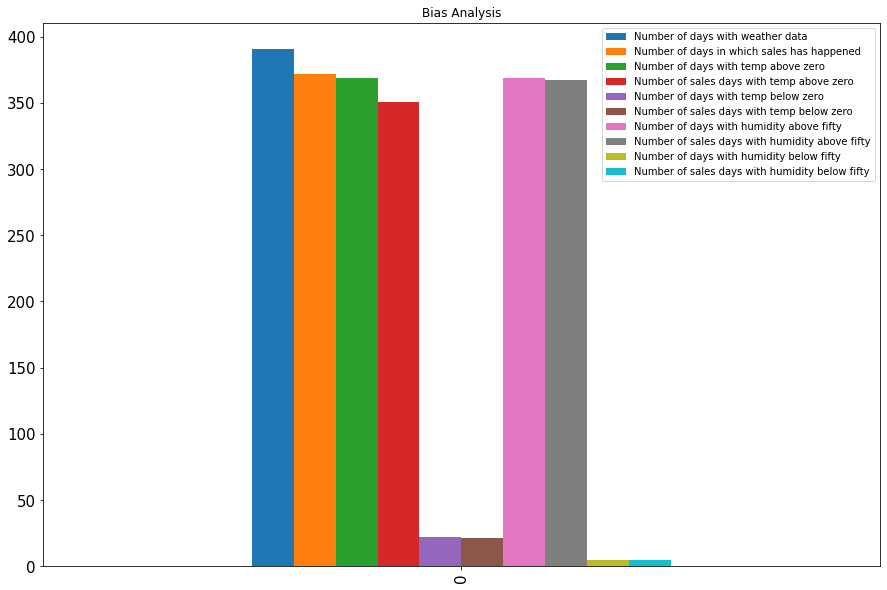

Current size: [30, 20]


<Figure size 2160x1440 with 0 Axes>

In [108]:
ax = Biasanalysistable[['Number of days with weather data','Number of days in which sales has happened',
                        'Number of days with temp above zero', 'Number of sales days with temp above zero',
                       'Number of days with temp below zero', 'Number of sales days with temp below zero',
                       'Number of days with humidity above fifty','Number of sales days with humidity above fifty',
                       'Number of days with humidity below fifty','Number of sales days with humidity below fifty',
                       ]].plot(kind='bar', title ="Bias Analysis", figsize=(15, 10), legend=True, fontsize=15)


plt.show()

print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('biasanalysis.png')



# Conclusion

##### The house prices are dependent on different properties of the houses such as their living area square footage or basement as well as their number of bedrooms and floors. However there is no clear correlation between different weather conditions and house prices or sales. The house sales dataset is from King County, WA where the weather does not fluctuate much throughout the year. With a mild winter and not very hot summer, with only few days with temperatures below zero or humidities below 50%, we can say the weather conditions is fairly and always constant in this region. The results however could be different if the data for a region with different weather conditions throughout the year was analyzed.